# Cars Dataset

### The dataset scraped from AutoScout24 and contains info about cars like model, mileage, horse power, etc

#### useful libraries for the project 

In [1]:
import pandas as pd
import numpy as np
import math
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

#### reading the file 'autoscout24-germany-dataset' into a pandas DataFrame and finding the first 5 rows with .head()

In [2]:
df = pd.read_csv('autoscout24_germany_dataset.csv', sep=',')
df.head(5)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


#### getting a sample of the observations

In [3]:
df_sample = df.sample(10)
df_sample

,mileage,make,model,fuel,gear,offerType,price,hp,year
37496,43000,Opel,Mokka,Gasoline,Manual,Used,11950,140.0,2014
1576,19816,Jeep,Compass,Diesel,Manual,Used,19800,120.0,2017
22557,31260,Ford,Kuga,Gasoline,Manual,Used,15490,150.0,2017
33484,120000,Opel,Astra,Gasoline,Manual,Used,7800,140.0,2013
43653,14517,Peugeot,2008,Gasoline,Automatic,Used,17221,131.0,2019
17999,12,Opel,Corsa,Gasoline,Manual,Employee's car,18581,101.0,2021
41984,38155,Mercedes-Benz,GLE 500,Electric/Gasoline,Automatic,Used,54900,333.0,2018
33061,53000,Hyundai,i20,Gasoline,Automatic,Used,8099,101.0,2012
42593,10114,Renault,ZOE,Electric,Automatic,Used,13890,72.0,2018
30145,128460,Opel,Astra,Gasoline,Manual,Used,7300,101.0,2016


### understanding better our data

#### finding dataframe's shape 

In [4]:
df.shape

(46405, 9)

the dataframe has 46405 rows and 9 columns

#### displaying the tail of the dataframe (the last 5 rows)

In [5]:
display(df.tail(5))

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


#### information about the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


#### columns to a list

In [7]:
list(df.columns)

['mileage',
 'make',
 'model',
 'fuel',
 'gear',
 'offerType',
 'price',
 'hp',
 'year']

#### checking the datatypes of the columns

In [8]:
df.dtypes 
# or in a list
# list(zip(df.columns,df.dtypes))

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

#### Checking the number of unique features per column

In [9]:
df.nunique()

mileage      20117
make            77
model          841
fuel            11
gear             3
offerType        5
price         6668
hp             328
year            11
dtype: int64

### working with column names

#### Standardizing header-column names in the dataframe by using only lowercase letters and replacing the spaces with underscores. The columns are almost standardized

In [10]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

#### renaming the columns: offerType to offer_type, fuel to fuel_type, gear to gearbox

In [11]:
df = df.rename(columns={'offertype':'offer_type',
                       'fuel':'fuel_type',
                       'gear':'gearbox'})
list(df.columns)

['mileage',
 'make',
 'model',
 'fuel_type',
 'gearbox',
 'offer_type',
 'price',
 'hp',
 'year']

<!-- ### explanations of the columns
### mileage: how many kilometers the car has traveled?
### make: the make of the car, for example BMW, VW, Toyota
### model: the exact model of the car, for example Yaris (from Toyota Yaris)
### fuel_type: the type of fuel, for example Electric, Gasoline, Diesel
### gearbox: the type of gearbox, automatic, manual
### offer_type: the method of the offer, for example used, pre-registered
### price: the price of the car
### hp: horse power of the car
### year: the year of the car's first registration -->

## Expanation of the columns
#### mileage: how many kilometers the car has traveled
#### make: the make of the car, for example BMW, VW, Toyota
#### model: the model of the car, for example yaris (from Toyota yaris)
#### fuel_type: the type of fuel, for example electric, gasoline, diesel
#### gearbox: the type of the gearbox: manual, automatic or semi-automatic
#### offer_type: the type of the offer, for example used, pre-registered
#### price: the price of the car
#### hp: the horse power of the car
#### year: the year of the car's first registration

#### creating a new column that has the age of every observation-car, right now

In [12]:
df['age'] = datetime.datetime.now().year - df['year']
df.head(5)

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,11


#### Datetime format to the column year, from int64 we convert it to datetime 64

In [13]:
df['year']=pd.to_datetime(df['year'])
df.dtypes 
# we could also drop the column year but actually we will skip to use this specific column, later on
# df = df.drop(['year'], axis=1)

mileage                int64
make                  object
model                 object
fuel_type             object
gearbox               object
offer_type            object
price                  int64
hp                   float64
year          datetime64[ns]
age                    int64
dtype: object

### checking and dealing with NaN values

#### checking which columns have NaN values 

In [14]:
df.isna().any()

mileage       False
make          False
model          True
fuel_type     False
gearbox        True
offer_type    False
price         False
hp             True
year          False
age           False
dtype: bool

#### checking how many NaN values are per column

In [15]:
df.isna().sum()

mileage         0
make            0
model         143
fuel_type       0
gearbox       182
offer_type      0
price           0
hp             29
year            0
age             0
dtype: int64

there are 143 NaN values in model column, 182 NaN values in gearbox column and 29 NaN values in hp column

#### the percentage of null values per column

In [16]:
df_nan_per = pd.DataFrame( round(df.isna().sum()/len(df),4)*100)
df_nan_per

,0
mileage,0.00
make,0.00
model,0.31
fuel_type,0.00
gearbox,0.39
offer_type,0.00
price,0.00
hp,0.06
year,0.00
age,0.00


0,31% of the observations in column model are NaN values, 0,39% of the observations in column gearbox are NaN values and 0,06% of the observations in column hp are NaN values

#### getting a heatmap with NaN values

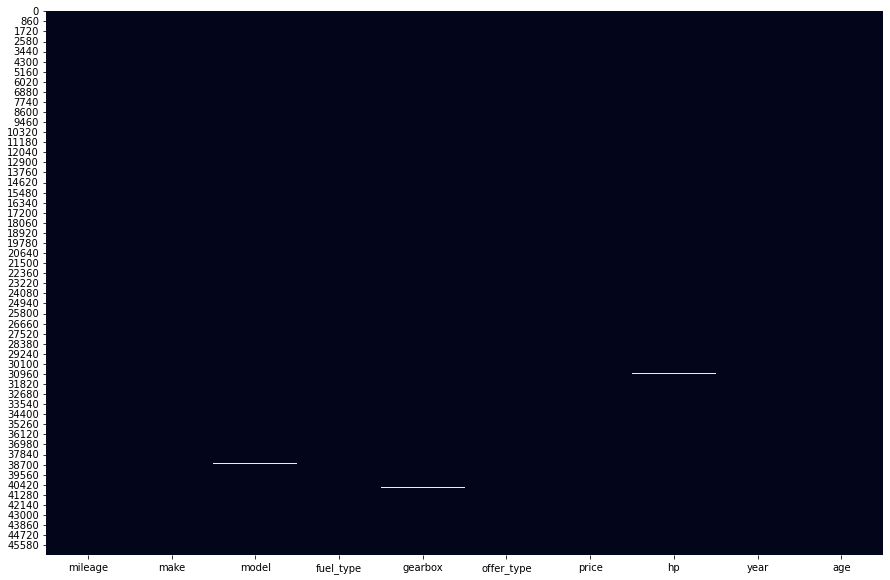

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

#### for the column gearbox we will add an extra option and we will replace the NaN values with the option unknown

In [18]:
df['gearbox'].fillna('unknown', inplace=True)
df['gearbox'].isna().sum()

0

checking the results, no presence of NaN values in column gearbox

#### defining as nan_columns the rest of the columns that have NaN values

In [19]:
nan_columns = df.columns[df.isna().any()]
nan_columns

Index(['model', 'hp'], dtype='object')

#### removing the rows that contains NaN values with the dropna() method.

In [20]:
df.dropna(axis=0, inplace=True)

list(zip(df.columns, df.isna().sum()))

[('mileage', 0),
 ('make', 0),
 ('model', 0),
 ('fuel_type', 0),
 ('gearbox', 0),
 ('offer_type', 0),
 ('price', 0),
 ('hp', 0),
 ('year', 0),
 ('age', 0)]

checking the results, no presence of NaN values in the nan_columns 

#### getting the new shape after droping some rows with NaN values

In [21]:
df.shape

(46236, 10)

there are 46236 rows instead of 46405 we had in the beginning. 169 less rows.

#### getting the new heatmap with NaN values

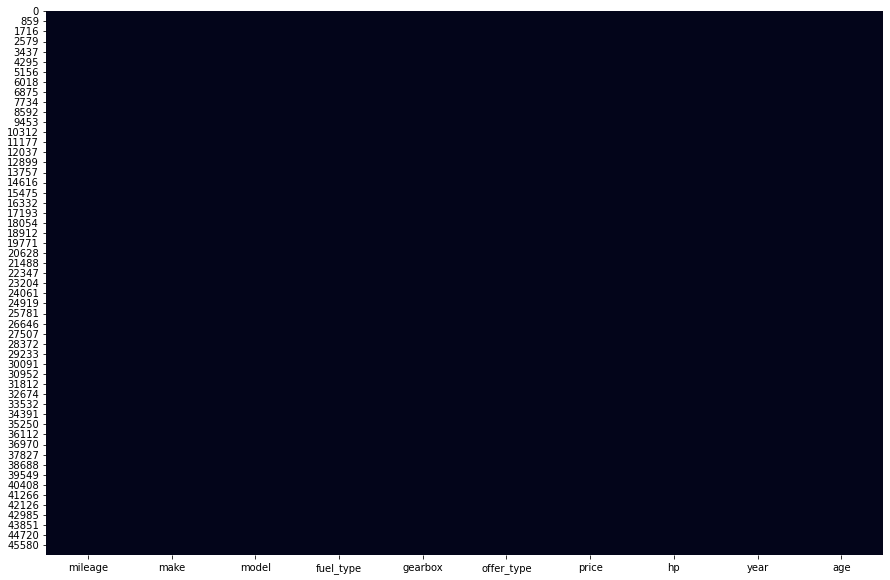

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

no NaN values, as we expected

#### removing duplicate registrations and there are 44107 observations instead of 46236
the duplicate registrations could be the same cars which are sold from different merchadisers or one car could be registrered twice or more times, by mistake. It is very rare for 2 different cars to have the same values in 10 different factors-parameters and this scenario applies almost 2000 times out of 46000, we assume these cars as duplicate registrations

In [23]:
df = df.drop_duplicates(keep='first')
df.shape[0]

44107

#### converting the type of hp column from float to int 

In [24]:
 df['hp'] = df['hp'].astype(np.int64)
df['hp'].dtypes 

dtype('int64')

### seperating numerical and categorical columns 

#### checking which columns are numerical

In [25]:
df_num = df._get_numeric_data().columns.values
df_num

array(['mileage', 'price', 'hp', 'age'], dtype=object)

#### displaying the numerical columns

In [26]:
df_num = df.select_dtypes(include=['float', 'int'])
df_num.head(3)

,mileage,price,hp,age
0,235000,6800,116,11
1,92800,6877,122,11
2,149300,6900,160,11


#### checking which columns are categorical, in a list

In [27]:
categorical = list(df.select_dtypes(['object']).columns.values)
categorical

['make', 'model', 'fuel_type', 'gearbox', 'offer_type']

#### displaying the categorical columns

In [28]:
df_cat = df.select_dtypes(['object'])
df_cat.tail(3)

,make,model,fuel_type,gearbox,offer_type
46397,Fiat,500,Electric/Gasoline,Manual,Demonstration
46398,Fiat,Panda,Electric/Gasoline,Manual,Demonstration
46399,Skoda,Fabia,Gasoline,Manual,Demonstration


## EDA (Exploratory Data Analysis)

#### looking for the values and the amount of them,respectively, for every column - feature 

In [29]:
 for col in df:
    print(df[col].value_counts(), '\n')

10        956
50        295
20        287
5         214
100       207
         ... 
47446       1
29562       1
121134      1
140647      1
837         1
Name: mileage, Length: 20058, dtype: int64 

Volkswagen    6693
Opel          4583
Ford          4274
Skoda         2739
Renault       2692
              ... 
FISKER           1
Brilliance       1
Tazzari          1
Zhidou           1
Alpine           1
Name: make, Length: 73, dtype: int64 

Golf                         1453
Corsa                        1395
Fiesta                       1235
Astra                        1142
Focus                         948
                             ... 
Gallardo                        1
S60 Cross Country               1
John Cooper Works Clubman       1
323                             1
NV250                           1
Name: model, Length: 840, dtype: int64 

Gasoline             27307
Diesel               14725
Electric/Gasoline     1043
Electric               693
CNG                    113
LPG

#### describing the dataframe for numerical features

In [30]:
df.describe()

,mileage,price,hp,age
count,4.410700e+04,4.410700e+04,44107.000000,44107.000000
mean,7.232136e+04,1.652929e+04,133.514431,6.070170
std,6.218891e+04,1.942342e+04,75.012750,3.119355
min,0.000000e+00,1.100000e+03,1.000000,1.000000
25%,2.150000e+04,7.490000e+03,86.000000,3.000000
50%,6.126000e+04,1.099000e+04,116.000000,6.000000
75%,1.060000e+05,1.949000e+04,150.000000,9.000000
max,1.111111e+06,1.199900e+06,850.000000,11.000000


#### describing the dataframe for categorical features

In [31]:
df.describe(include=["bool","object"])

,make,model,fuel_type,gearbox,offer_type
count,44107,44107,44107,44107,44107
unique,73,840,11,4,5
top,Volkswagen,Golf,Gasoline,Manual,Used
freq,6693,1453,27307,28752,38705


#### different plots per numerical pairs

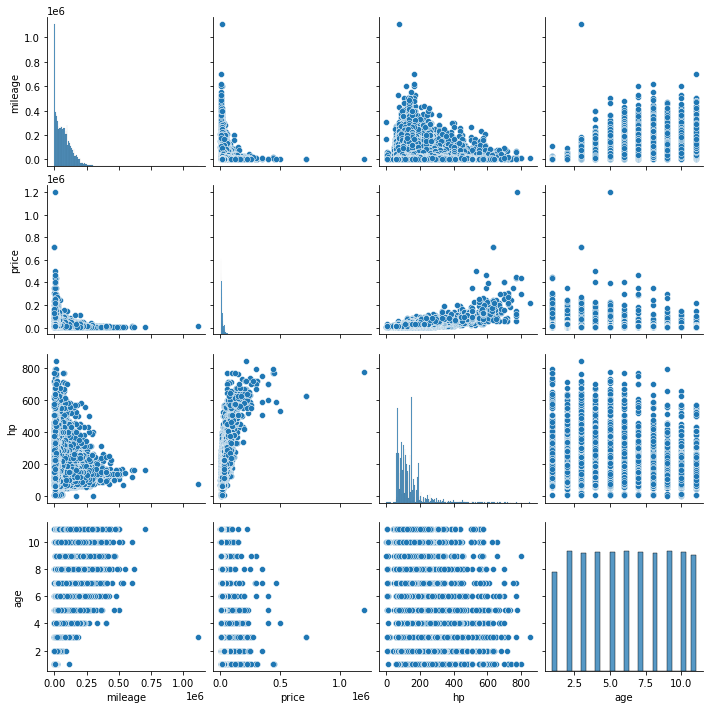

In [32]:
sns.pairplot(df_num)

we could check some trends

#### plotting multiple plots in the same space to find interesting plots and useful insights, we can choose the interesting plots and then replot them

(array([3994., 4083., 4115., 4037., 4073., 4105., 4087., 4088., 4044.,
        7481.]),
 array([2.32754630e-11, 2.32870370e-11, 2.32986111e-11, 2.33101852e-11,
        2.33217593e-11, 2.33333333e-11, 2.33449074e-11, 2.33564815e-11,
        2.33680556e-11, 2.33796296e-11, 2.33912037e-11]),
 <BarContainer object of 10 artists>)

<Figure size 1728x864 with 0 Axes>

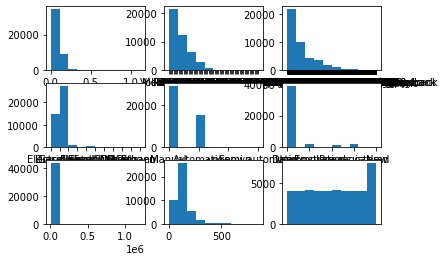

In [33]:
plt.figure(figsize=(24,12))
fig, axs = plt.subplots(3, 3) 

axs[0, 0].hist(df['mileage'])
axs[0, 1].hist(df['make'])
axs[0, 2].hist(df['model'])
axs[1, 0].hist(df['fuel_type'])
axs[1, 1].hist(df['gearbox'])
axs[1, 2].hist(df['offer_type'])
axs[2, 0].hist(df['price'])
axs[2, 1].hist(df['hp'])
axs[2, 2].hist(df['year'])

#### distribution plots of the numerical variables

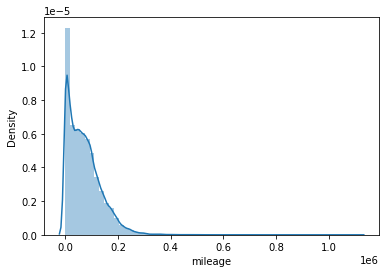

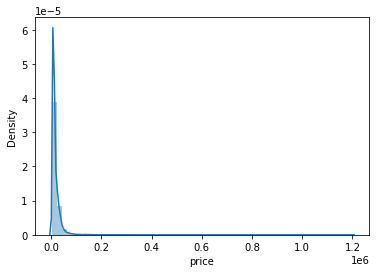

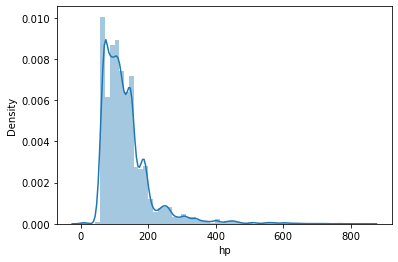

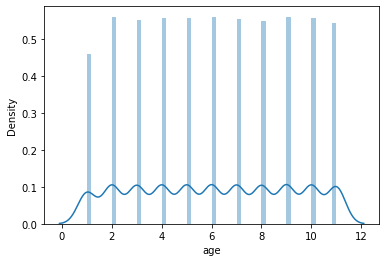

In [34]:
for col in df_num:
    sns.distplot(df_num[col], bins=60)
    plt.show()

some of the distributions are skewed, needed to normalize them

#### plotting the distribution plot from the most interesting feature (column price: will be the target)

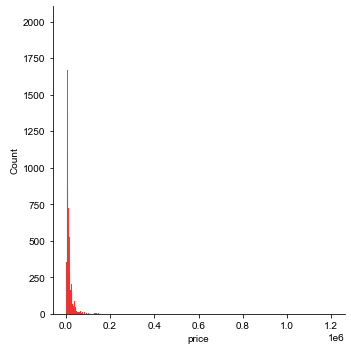

In [35]:
sns.displot(data=df, x="price", color='r', binwidth=400)
sns.set(rc = {'figure.figsize':(20,10)})
plt.show()

seems that there are some big outliers that will be more clear and noticeable from the boxplots will be plotted

#### creating a new dataframe from the existing dataframe with specific columns in order to use them for scatterplotting

In [36]:
scat_cols= df[['mileage','fuel_type', 'gearbox', 'offer_type', 'hp', 'year', 'age', 'price']]
scat_cols.tail(5)

,mileage,fuel_type,gearbox,offer_type,hp,year,age,price
46394,10,Gasoline,Manual,Pre-registered,72,1970-01-01 00:00:00.000002021,1,12340
46396,99,Electric/Gasoline,Manual,Pre-registered,71,1970-01-01 00:00:00.000002021,1,12490
46397,550,Electric/Gasoline,Manual,Demonstration,69,1970-01-01 00:00:00.000002021,1,12805
46398,837,Electric/Gasoline,Manual,Demonstration,69,1970-01-01 00:00:00.000002021,1,12805
46399,1500,Gasoline,Manual,Demonstration,60,1970-01-01 00:00:00.000002021,1,12980


#### scatterplotting

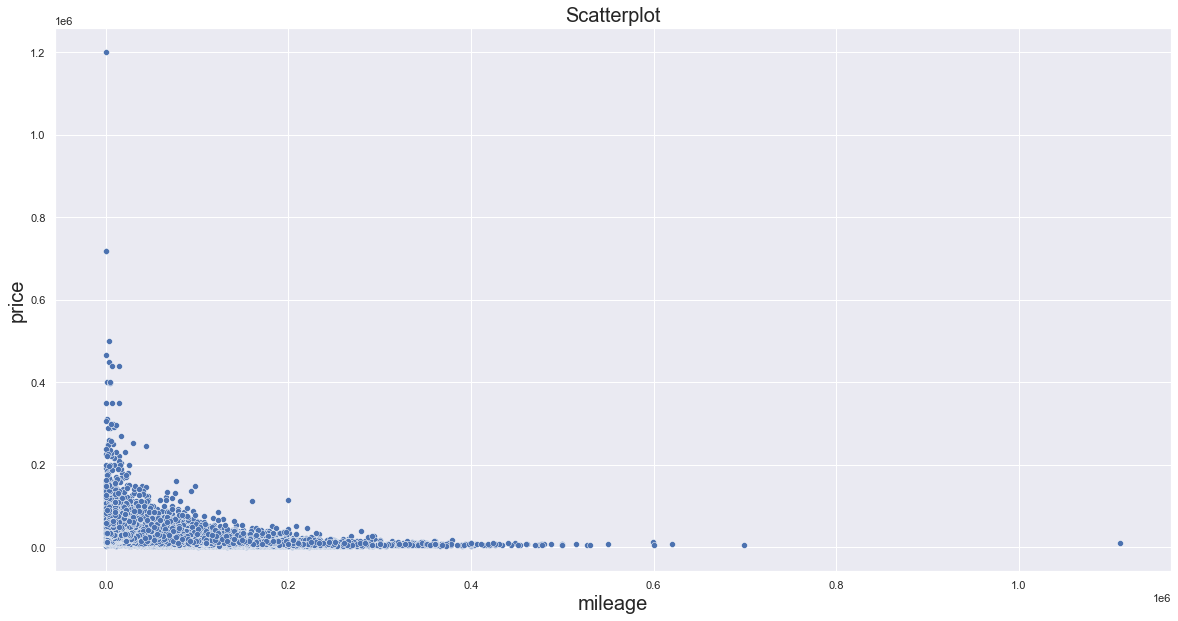

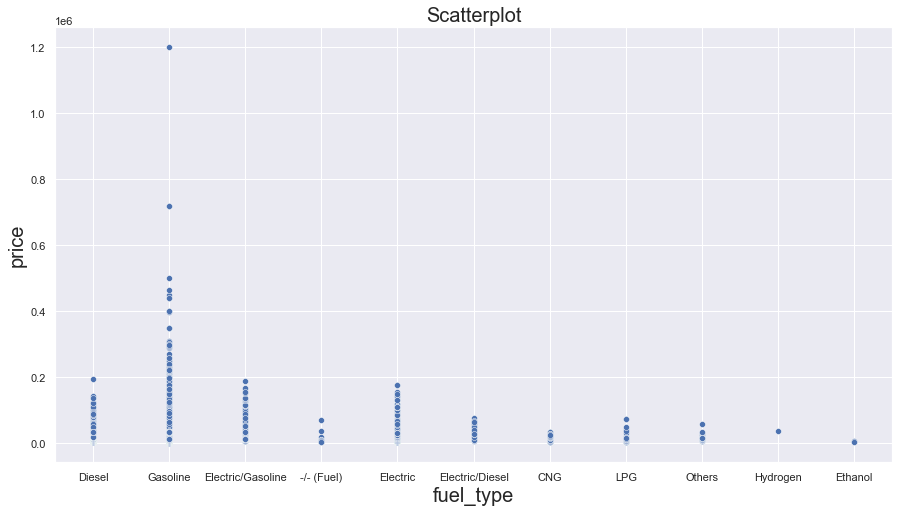

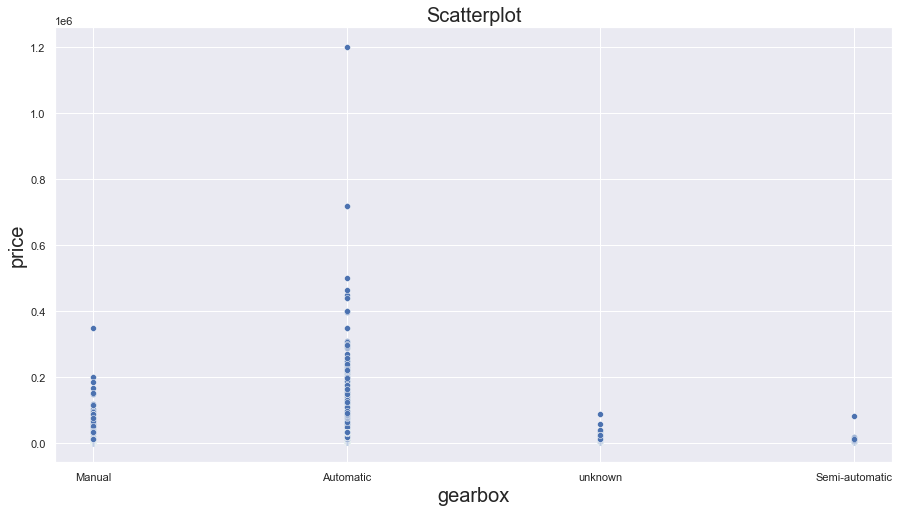

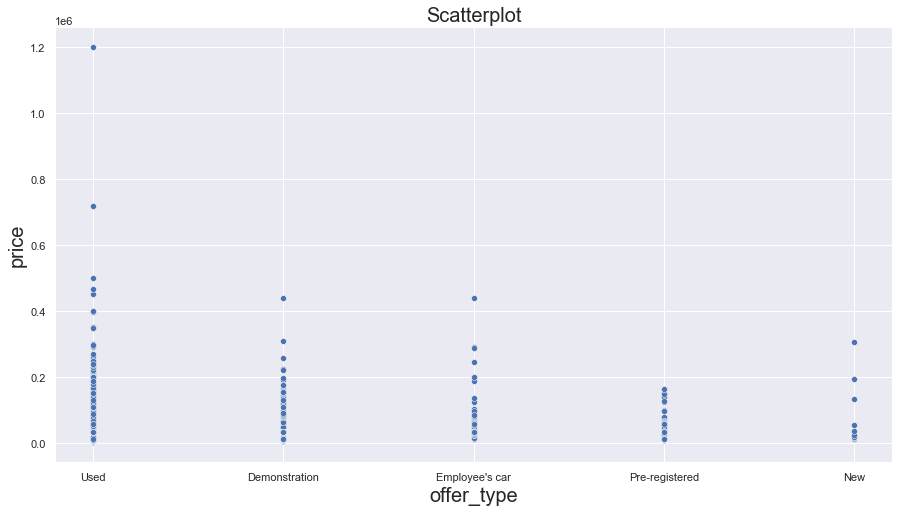

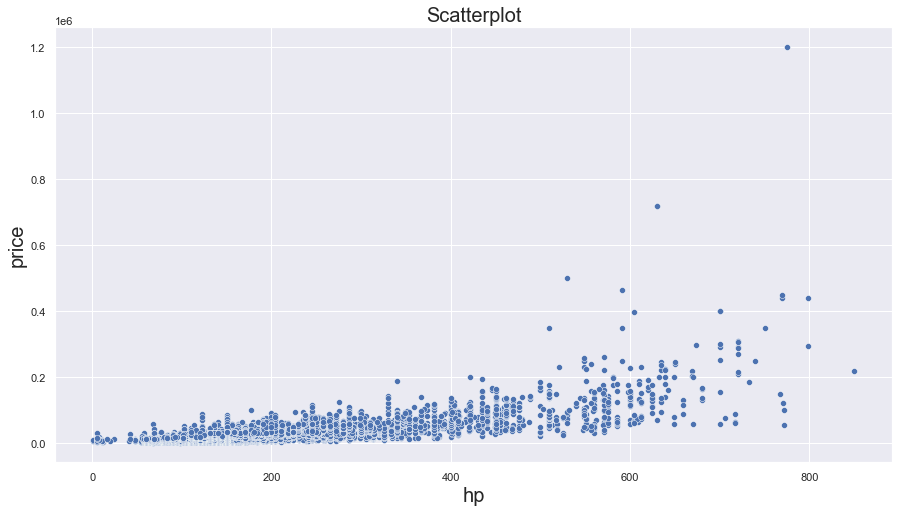

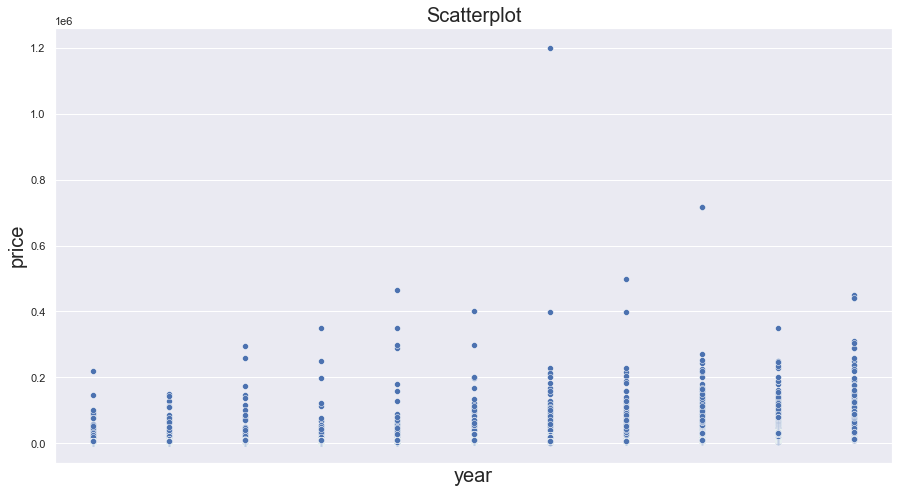

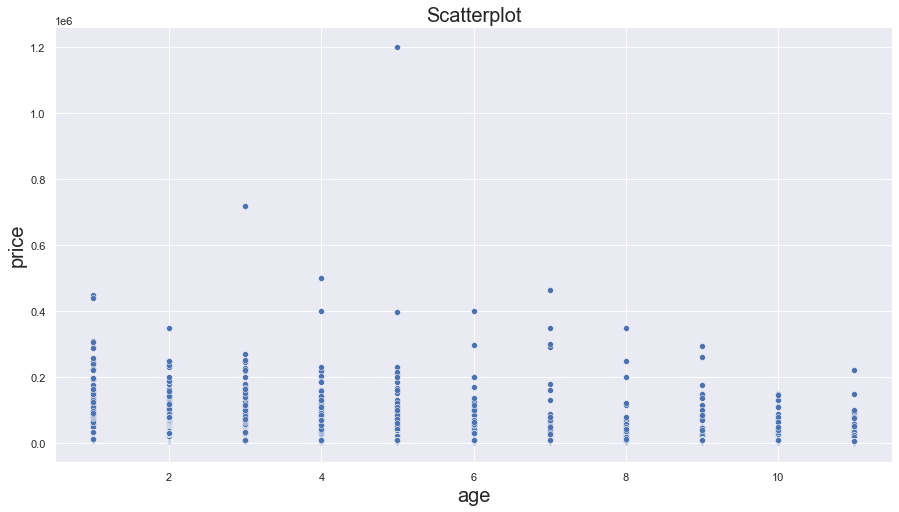

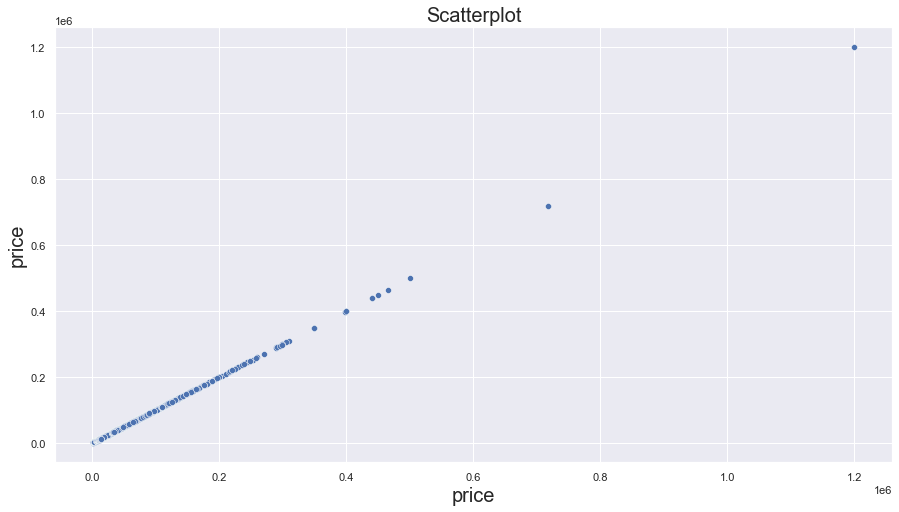

In [37]:
for col in scat_cols:
    p = sns.scatterplot(x=scat_cols[col], y=scat_cols['price'])
    p.set_ylabel("price", fontsize = 20)
    p.set_xlabel(col, fontsize = 20)
    p.set_title("Scatterplot", fontsize = 20)
    sns.set(rc = {'figure.figsize':(15,8)})
    plt.show()

### some insights of the scatterplots:

In this case the scatterplots give us better insights for the numerical features

mileage-price -> mileage is numerical feature, seems like Inverse (negative) Exponential function, the lower the mileage is, then the price becomes higher and vice versa

fuel_type-price -> fuel_type is categorical feature, the majority of the cars have as fuel type gasoline, diesel and electric/gasoline there are not clear insights for the realationship fuel_type-price with the scatterplot

gearbox-price-> gearbox is categorical feature, the majority of the cars have as gearbox manual and automatic. We could notice that cars with automatic gearbox tend to be more expensive 

offer_type-price -> offer_type is categorical feature, the majority of the cars have as offer type used. There are not clear insights for the realationship offer_type-price with the scatterplot

hp-price -> hp is numerical feature, seems like the observations are fitted with a polynomial line. Cars with higher HP tend to be more expensive

year-price -> year is numerical feature, seems like proportional amounts. The higher the year is, then the price becomes higher and vice versa

age-price -> age is numerical feature, seems like inversely proportional amounts. The higher the age is, then the price becomes lower and vice versa

price-price -> price is numerical feature, is the perfect linear regression as we have the same features in the labels for the categorical features we need to try different plots like barplots or countplots to have a better picture and to make safe conclusions

#### plotting a 3D plot for hp, age and price

Text(0.5, 0, 'price')

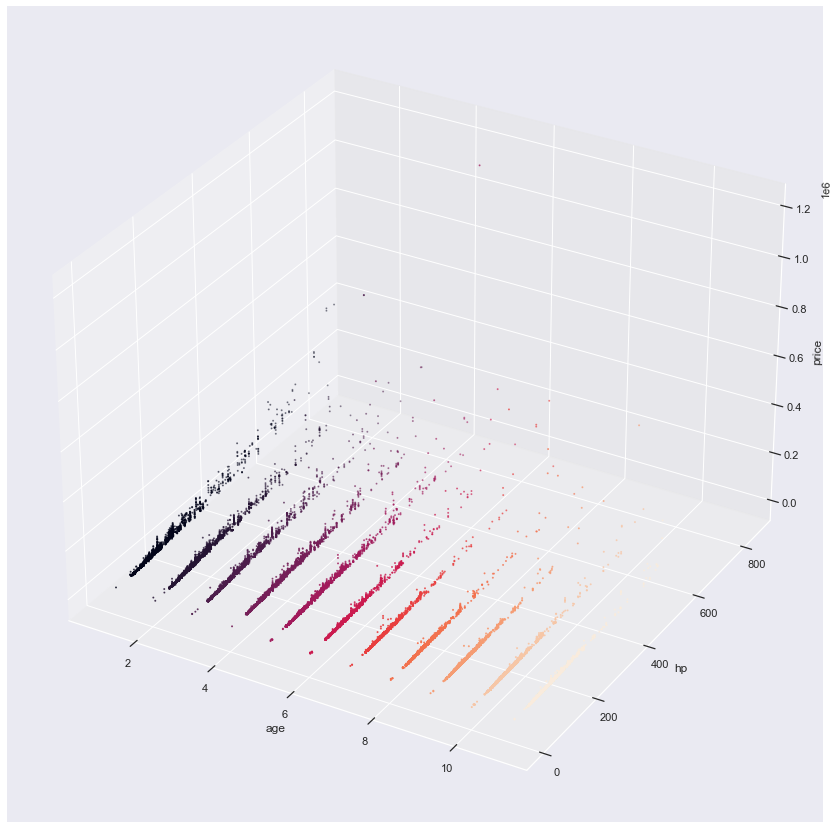

In [38]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

hp = df['hp']
age = df['age']
price = df['price']

ax.scatter3D(age, hp, price, c=df['age'], s=1)
ax.set_xlabel('age')
ax.set_ylabel('hp')
ax.set_zlabel('price')

#### checking the outliers in the numerical variables with boxplots

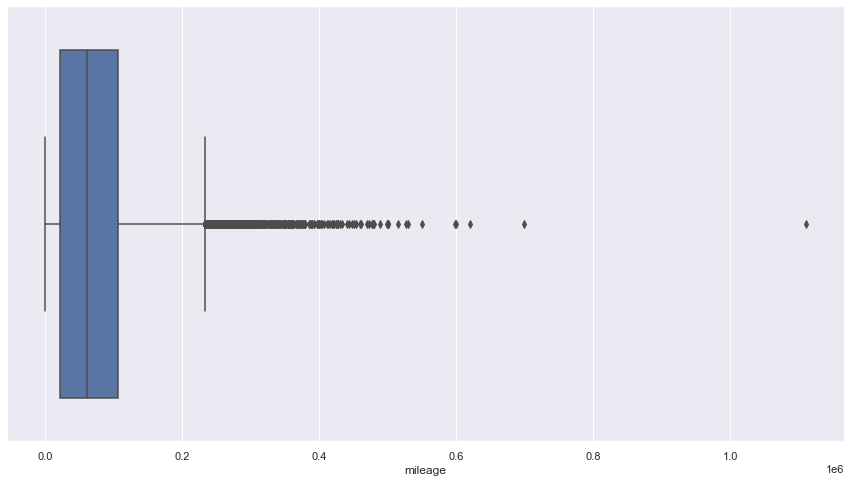

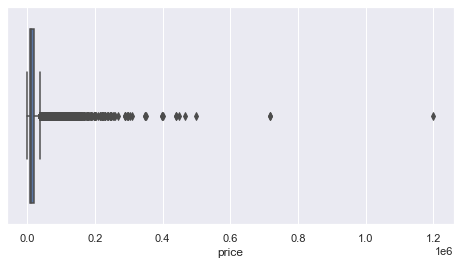

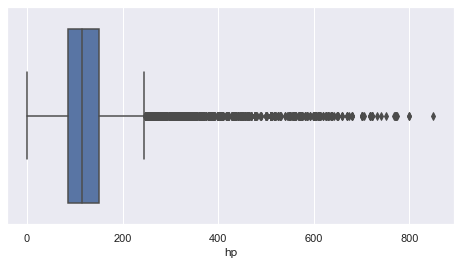

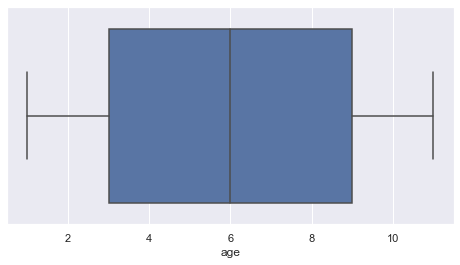

In [39]:
for col in df_num:
    sns.boxplot(df_num[col])
    sns.set(rc = {'figure.figsize':(8,4)})
    plt.show()

We can notice a lot of outliers in the numerical features, remarkable insight

### Creating scenarios

### playing with the data - finding cheap opportunities

#### top 10 mileaged cars

In [40]:
top10_mileage = df[['mileage','make','model','fuel_type','gearbox','offer_type','price','hp','age']].nlargest(10, ['mileage']).set_index('age')
top10_mileage

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp
age,,,,,,,,
3,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73
11,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163
8,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163
10,599900,Ford,Transit,Diesel,Manual,Used,5990,116
7,598744,Mercedes-Benz,Sprinter,Diesel,Manual,Used,13078,163
8,550000,Iveco,Daily,Diesel,Manual,Used,8000,145
7,530003,Citroen,C3,Gasoline,Manual,Used,5500,68
10,527205,Mercedes-Benz,C 220,Diesel,Automatic,Used,4899,170
7,514614,Mercedes-Benz,E 200,Diesel,Automatic,Used,7200,136


most of the top 10 mileaged cars are Mercedes-Benz (5/10) and their fuel type is Diesel. We could assume that these cars are reliable

#### top 10 most expensive cars

In [41]:
top10_price = df[['mileage','make','model','fuel_type','gearbox','offer_type','price','hp','age']].nlargest(10, ['price']).set_index('age')
top10_price

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp
age,,,,,,,,
5,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775
3,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630
3,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630
4,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530
7,350,Mercedes-Benz,SLS,Gasoline,Automatic,Used,465000,591
1,3600,Lamborghini,Aventador,Gasoline,Automatic,Used,449900,770
1,14090,Lamborghini,Aventador,Gasoline,Automatic,Employee's car,439900,770
1,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799
6,1200,Lamborghini,Aventador,Gasoline,Automatic,Used,399999,700


the most expensive cars use gasoline, have an automatic gearbox, little mileage and high hp 

#### top 10 hp cars

In [42]:
top10_hp = df[['mileage','make','model','fuel_type','gearbox','offer_type','price','hp','age']].nlargest(10, ['hp']).set_index('age')
top10_hp

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp
age,,,,,,,,
3,9234,Mercedes-Benz,G 63 AMG,Gasoline,Automatic,Used,216619,850
1,6500,Ferrari,812,Gasoline,Automatic,Demonstration,439900,799
9,11000,Audi,R8,Gasoline,Automatic,Used,295000,799
5,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775
7,71099,Tesla,Model S,Electric,Automatic,Used,54450,772
6,63205,Tesla,Model X,Electric,Automatic,Used,99999,772
1,50,Ford,Mustang,Gasoline,Automatic,Used,121000,771
1,14090,Lamborghini,Aventador,Gasoline,Automatic,Employee's car,439900,770
1,3600,Lamborghini,Aventador,Gasoline,Automatic,Used,449900,770


every car of the top 10 hp cars has an Automatic gearbox, car manufacturers might use automatic gearbox for high horsepower cars

#### grouping the data based on column make and printing the first entries of every make

In [43]:
df_groupby_make = df.groupby('make')
df_groupby_make.first()

,mileage,model,fuel_type,gearbox,offer_type,price,hp,year,age
make,,,,,,,,,
Abarth,21500,500,Gasoline,Manual,Used,11850,160,1970-01-01 00:00:00.000002015,7
Aixam,5,City,Diesel,Automatic,Used,17370,8,1970-01-01 00:00:00.000002021,1
Alfa,120000,Romeo Giulietta,Gasoline,Manual,Used,6000,120,1970-01-01 00:00:00.000002011,11
Alpina,27223,B3,Gasoline,Automatic,Used,80990,409,1970-01-01 00:00:00.000002013,9
Alpine,3112,A110,Gasoline,Manual,Demonstration,74990,292,1970-01-01 00:00:00.000002021,1
...,...,...,...,...,...,...,...,...,...
Trucks-Lkw,312000,Ford,Diesel,unknown,Used,8200,131,1970-01-01 00:00:00.000002016,6
Volkswagen,92800,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
Volvo,60188,XC90,Diesel,Automatic,Used,45990,235,1970-01-01 00:00:00.000002018,4


#### Finding the values contained in the "Aixam" group-make

In [44]:
df_groupby_make.get_group('Aixam')

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
7597,5,Aixam,City,Diesel,Automatic,Used,17370,8,1970-01-01 00:00:00.000002021,1
37859,1200,Aixam,City,Electric,Automatic,Used,8500,5,1970-01-01 00:00:00.000002014,8


only 2 cars from the make Aixam

#### checking some opportunities of used cars with good characteristics and low prices

In [45]:
good_cars_low_prices = df[(df['price'] < 10000) & (df['mileage'] < 50000) & (df['offer_type'] == 'Used') & (df['hp'] > 100) & (df['age'] <= 5)]
good_cars_low_prices.sort_values(by=["price",'mileage'], ascending=[True,False])
# good_cars_low_prices.describe()

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
3050,15000,Ford,Focus,Gasoline,Automatic,Used,7300,150,1970-01-01 00:00:00.000002017,5
40745,31024,Fiat,500,Gasoline,Manual,Used,8220,105,1970-01-01 00:00:00.000002017,5
3490,42000,Opel,Corsa,Gasoline,Manual,Used,8490,101,1970-01-01 00:00:00.000002017,5
3491,36000,Opel,Corsa,Gasoline,Manual,Used,8490,101,1970-01-01 00:00:00.000002017,5
41044,35000,Citroen,C-Elysée,Gasoline,Manual,Used,8490,116,1970-01-01 00:00:00.000002017,5
11718,42000,Opel,Corsa,Gasoline,Manual,Used,8750,101,1970-01-01 00:00:00.000002017,5
41152,40000,Opel,Astra,Gasoline,Automatic,Used,8790,105,1970-01-01 00:00:00.000002017,5
9788,38500,Opel,Corsa,Gasoline,Manual,Used,8980,101,1970-01-01 00:00:00.000002017,5
5416,49977,Hyundai,i20,Gasoline,Manual,Used,8990,101,1970-01-01 00:00:00.000002017,5
12805,45650,Mitsubishi,Lancer,Gasoline,Manual,Used,9000,117,1970-01-01 00:00:00.000002017,5


27 opportunities

#### most of the opportunities are from makes Opel and Ford

In [46]:
good_cars_low_prices['make'].value_counts()

Opel          12
Ford           7
Hyundai        2
Fiat           2
Lada           1
Mitsubishi     1
Renault        1
Citroen        1
Name: make, dtype: int64

#### finding the average price per make and sorting the average prices

In [47]:
average_price_per_make = df.groupby('make').apply(lambda x:np.average(x['price'])).reset_index(name='avg_price')
average_price_per_make.sort_values(by=["avg_price"], ascending=[True])

,make,avg_price
10,Brilliance,1500.000000
52,Others,1850.000000
20,Daihatsu,4926.700000
37,Lancia,6214.312500
65,Tazzari,6500.000000
...,...,...
9,Bentley,203992.750000
45,McLaren,204967.272727
36,Lamborghini,305698.777778
24,Ferrari,324028.181818


the make Brilliance has the cheapest cars on average, the make Maybach has the most expensive cars on average

#### We assume that a manager of a company which products a specific make (car manufacturer) is interested about some elements - trends for his company. Let's choose a german make, the case study of Volkswagen (VW). 

#### the manager requests to count the total number of Volkswagen cars in the dataset from the column make

In [48]:
number_of_VW = sum(df['make'] == 'Volkswagen')
# or
# df_groupby_make.get_group('Volkswagen')
print ('The summary of Volkswagen cars in the dataset is', number_of_VW)

The summary of Volkswagen cars in the dataset is 6693


#### the manager requests to count the total number of Golf cars in the dataset from the column model

In [49]:
total_number_of_golf = sum(df['model'] == 'Golf')
# total_number_of_golf = (df['model'] == 'Golf') # checking if the specific observation is Golf (True) or not(False) 
print ('The summary of Volkswagen Golf cars in the dataset is', total_number_of_golf)

The summary of Volkswagen Golf cars in the dataset is 1453


#### the manager requests a plot of the total number of cars based on the make

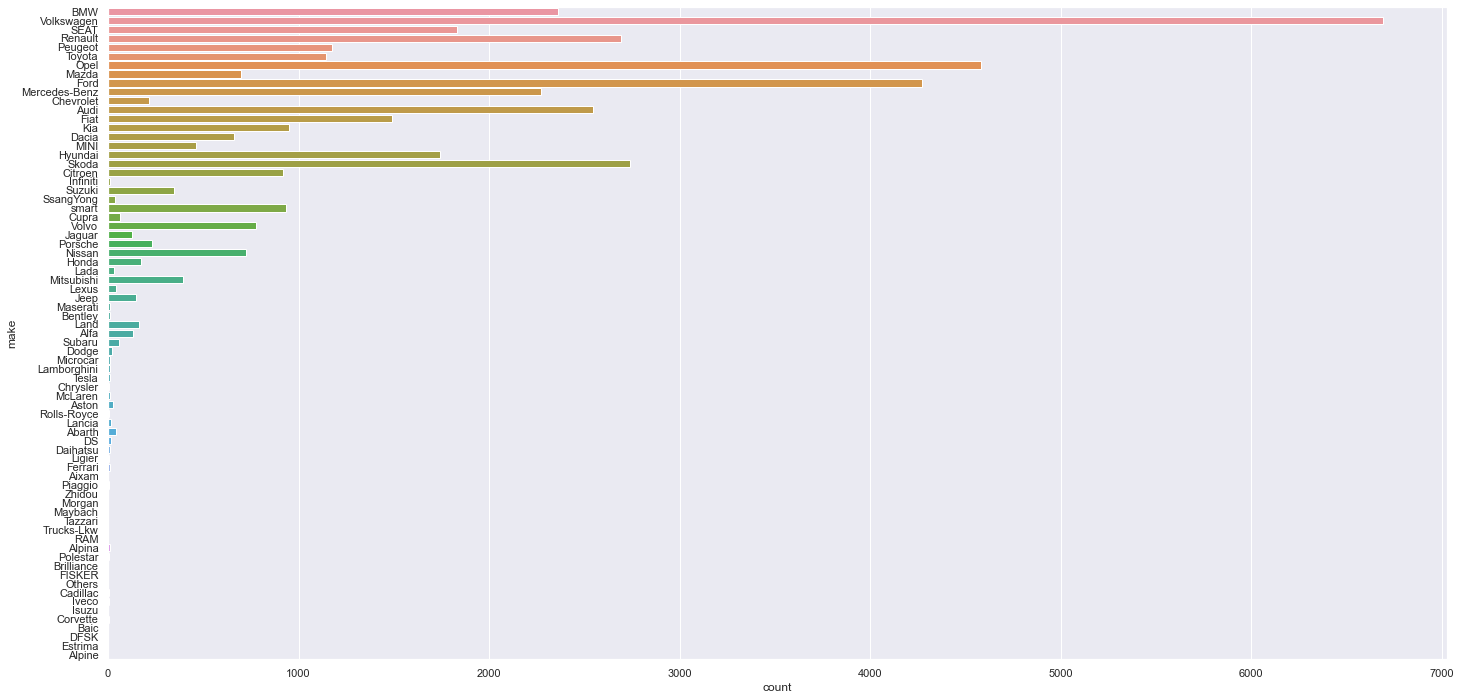

In [50]:
plt.figure(figsize=(24,12))
sns.countplot(y ='make', data= df)
# sns.set(rc = {'figure.figsize':(24,12)})
plt.show()

the make with the most cars for selling is Volkswagen. From the one hand people tend to sell VW cars more frequently than other makes and is not a good sign especially for the used cars, because someone could think that a lot of people sell their VW cars as they are not pleased, from the other hand Volkswagen cars are very popular cars in Germany.  Actually, in 2021, the Volkswagen Golf, T-Roc and Tiguan were the best-selling car models in Germany. So, it is logical that there are so many Volkswagen cars and we could say to the manager not to worry about the results of these plots

#### Creating a new dataframe only with VW cars

In [51]:
VW_df = df[(df.make == "Volkswagen")]
VW_df.iloc[2:7,1:3] 

,make,model
15,Volkswagen,Polo
21,Volkswagen,Golf
23,Volkswagen,Cross Touran
24,Volkswagen,Beetle
25,Volkswagen,Golf Cabriolet


displaying from third to seventh row, 2nd and 3rd column from the VW dataframe

#### getting the numerical features and describing the dataframe of VW cars

In [52]:
VW_df_num = VW_df.select_dtypes(include=['number'])
VW_df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,6693.0,81372.160616,65480.949733,1.0,26300.0,70000.0,118332.0,500000.0
price,6693.0,15962.334529,11943.602926,1396.0,7990.0,11497.0,20830.0,101880.0
hp,6693.0,124.096818,50.616792,60.0,90.0,116.0,150.0,476.0
age,6693.0,6.288062,3.048047,1.0,4.0,6.0,9.0,11.0


#### we could compare the VW measurements with the measurements of the whole dataframe

In [53]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,44107.0,72321.358152,62188.914475,0.0,21500.0,61260.0,106000.0,1111111.0
price,44107.0,16529.290589,19423.417574,1100.0,7490.0,10990.0,19490.0,1199900.0
hp,44107.0,133.514431,75.012750,1.0,86.0,116.0,150.0,850.0
age,44107.0,6.070170,3.119355,1.0,3.0,6.0,9.0,11.0


for instance we could say that the average price of the current dataframe is lower than the average price of the VW cars dataframe but the average HP of the current dataframe is higher than the average HP of the VW cars. We could inform the manager about the elements we got.

#### the manager requests a plot of the offer_type by the fuel_type to check trends in the fuel type offering

<AxesSubplot:xlabel='offer_type', ylabel='count'>

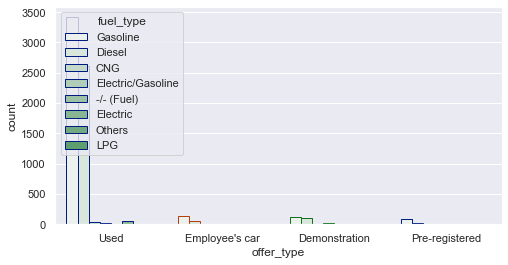

In [54]:
sns.countplot(x='offer_type', hue='fuel_type', color='g', edgecolor=sns.color_palette("dark", 3), data = VW_df)

#### the manager requests a plot of price by the fuel_type to check trends in pricing based on fuel_type

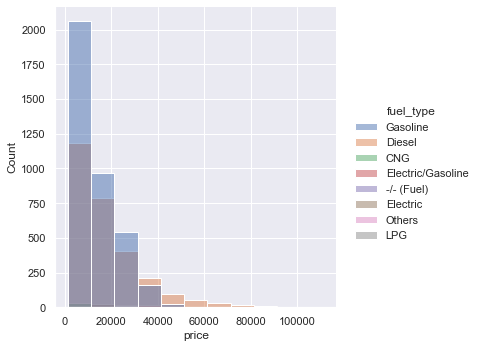

In [55]:
sns.displot(data=VW_df, x="price", hue="fuel_type", binwidth=10000)

#### the manager requests cheap opportunities for the Volkswagen best seller cars: Golf, T-Roc and Tiguan

In [56]:
VW_best_sellers = df[((df.model == "Golf") | (df.model == "T-Roc") | (df.model == "Tiguan")) & (df.price<8000)]
VW_best_sellers

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
11,84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105,1970-01-01 00:00:00.000002011,11
21,81970,Volkswagen,Golf,Gasoline,Manual,Used,7850,105,1970-01-01 00:00:00.000002012,10
214,132500,Volkswagen,Golf,Gasoline,Automatic,Used,7800,122,1970-01-01 00:00:00.000002011,11
224,87216,Volkswagen,Golf,Gasoline,Manual,Used,7970,122,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
37605,179854,Volkswagen,Golf,Gasoline,Manual,Used,7390,140,1970-01-01 00:00:00.000002014,8
37748,100000,Volkswagen,Golf,Gasoline,Manual,Used,7999,86,1970-01-01 00:00:00.000002014,8
39417,245335,Volkswagen,Golf,Diesel,Automatic,Used,6990,150,1970-01-01 00:00:00.000002015,7
40511,191795,Volkswagen,Golf,Diesel,Manual,Used,7850,110,1970-01-01 00:00:00.000002016,6


#### then the manager requests cheap opportunities for the Volkswagen best seller cars: Golf, T-Roc and Tiguan with high hp and fuel type Diesel

In [57]:
VW_best_sellers_opportunities = df[((df.model == "Golf") | (df.model == "T-Roc") | (df.model == "Tiguan")) & (df.price<8000) & (df.hp>100) & (df.fuel_type== "Diesel")]
VW_best_sellers_opportunities

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
627,264038,Volkswagen,Golf,Diesel,Manual,Used,4490,105,1970-01-01 00:00:00.000002012,10
690,278000,Volkswagen,Golf,Diesel,Manual,Used,5990,105,1970-01-01 00:00:00.000002015,7
1060,218199,Volkswagen,Golf,Diesel,Manual,Used,4999,105,1970-01-01 00:00:00.000002012,10
1082,200000,Volkswagen,Golf,Diesel,Manual,Used,6200,105,1970-01-01 00:00:00.000002014,8
1225,173100,Volkswagen,Golf,Diesel,Manual,Used,6200,105,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
37163,90391,Volkswagen,Golf,Diesel,Manual,Used,6980,105,1970-01-01 00:00:00.000002013,9
37247,180000,Volkswagen,Golf,Diesel,Manual,Used,7000,105,1970-01-01 00:00:00.000002013,9
39417,245335,Volkswagen,Golf,Diesel,Automatic,Used,6990,150,1970-01-01 00:00:00.000002015,7
40511,191795,Volkswagen,Golf,Diesel,Manual,Used,7850,110,1970-01-01 00:00:00.000002016,6


### seperating continuous and discrete numeric variables

#### defining a function for seperating continuous and discrete numeric variables. We use the random number 350 to filter each column and to compare the number of the unique values with the number 350

In [58]:
def variable(x):
    lst_cont=[]
    lst_disc=[]
    for i in x:
        if len(x[i].unique())>350:
            lst_cont.append(i)
        else:
            lst_disc.append(i)
    return x[lst_cont], x[lst_disc] 

#### seperating continuous, discrete

In [59]:
continuous_df, discrete_df = variable(df_num)

#### continuous stored

In [60]:
continuous_df

,mileage,price
0,235000,6800
1,92800,6877
2,149300,6900
3,96200,6950
4,156000,6950
...,...,...
46394,10,12340
46396,99,12490
46397,550,12805
46398,837,12805


#### discrete stored

In [61]:
discrete_df

,hp,age
0,116,11
1,122,11
2,160,11
3,110,11
4,156,11
...,...,...
46394,72,1
46396,71,1
46397,69,1
46398,69,1


### numerical features' correlations

#### to hide the repeat half of the heatmap we use the following mask

In [62]:
mask = np.zeros_like(df_num.corr())
mask
mask[np.triu_indices_from(mask)] = True 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

#### the correlations matrix from numerical columns

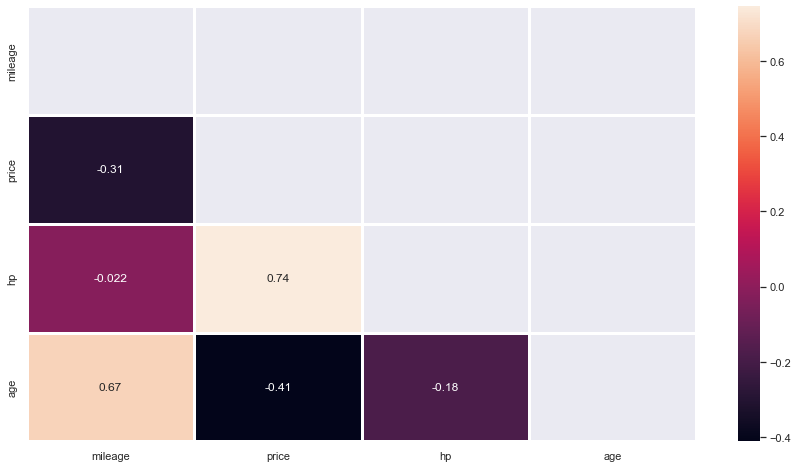

In [63]:
correlations_matrix = df_num.corr()
sns.heatmap(correlations_matrix,sns.set(rc = {'figure.figsize':(15,8)}), linecolor='white', linewidths=3, mask=mask, annot=True)
plt.show()

There is no multicollinearity between the features (one-to-one) as there is no correlation greater than 0.85. We could also use VIF technique, which is used to calculate multicolinearity between features, helping on the feature selection. For that purpose, we won't have the target variable in the calculation. In this case we can check the multicollinearity manually so we will not use VIF technique

### column price will be the target 

#### checking the correlation for each numerical column with the column 'price'

In [64]:
for i in df_num:
    correlation_with_price = df_num[i].corr(df_num['price'])
    print(i,'has correlation with price: ', round(correlation_with_price ,2))
# sorting the correlations
df_num.corr()['price'].sort_values(ascending=False)


mileage has correlation with price:  -0.31
price has correlation with price:  1.0
hp has correlation with price:  0.74
age has correlation with price:  -0.41


price      1.000000
hp         0.744893
mileage   -0.305364
age       -0.411495
Name: price, dtype: float64

the highest correlation is between hp and price. There are various strength of correlation:
if |correlation| < 0.3 -> very weak correlation,
if 0.3 <|correlation|< 0.5 -> weak correlation,
if 0.5 <|correlation|< 0.7 -> moderate correlation,
if |correlation|> 0.7 -> strong correlation,
where |correlation| is the Absolute value of the value

#### filtering the features that have strong correlation with the target 'price'

In [65]:
correlations_matrix = df_num.corr()
df_high_correlated = correlations_matrix[(correlations_matrix['price'] > .7) | (correlations_matrix['price'] < -.7)]['price']
df_high_correlated

price    1.000000
hp       0.744893
Name: price, dtype: float64

only column hp is high correlated with the price 

#### filtering the features that have very weak correlation with the target 'price'

In [66]:
correlations_matrix = df_num.corr()
df_low_correlated = correlations_matrix[((correlations_matrix['price'] < .3) & (correlations_matrix['price'] > -.3))]['price']
df_low_correlated

Series([], Name: price, dtype: float64)

there is no low correlated column with the price 

## Build a Model (X-y split, train-test split)

### column 'price' is the target variable

#### X-y split for the data
#### X: independent variables or predictors
#### Y: dependent variables or responses

In [67]:
y = df['price']
X = df.drop('price', axis=1)
print('X is:  \n', X, '\nand y is : ', y )

X is:  
        mileage        make   model          fuel_type gearbox      offer_type  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46394       10     Citroen      C1           Gasoline  Manual  Pre-registered   
46396       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46397      550        Fiat     500  Electric/Gasoline  Manual   Demonstration   
46398      837        Fiat   Panda  Electric/Gasoline  Manual   Demonstration   
46399     1500       Skoda   Fabia           Gasoline  Manual   Demonstration   

        hp        

#### categorical features and numerical features will be treated differently.
#### splitting every column except the target in numerical and categorical

In [68]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)
X_num

,mileage,hp,age
0,235000,116,11
1,92800,122,11
2,149300,160,11
3,96200,110,11
4,156000,156,11
...,...,...,...
46394,10,72,1
46396,99,71,1
46397,550,69,1
46398,837,69,1


#### In the following cell there is an approach that in the end does not work

In [69]:
# # train-test splitting
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # getting the subset of the trained data from the numerical data
# X_train_num = X_train.select_dtypes(include='number')
# X_train_num

# # getting the subset of the trained data from the categorical data
# X_train_cat = X_train.select_dtypes(include = object)
# X_train_cat

# # Let's use One Hot/Label Encoding for the categorical features
# encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
# encoded_train = encoder_train.transform(X_train_cat).toarray()
# cols = encoder_train.get_feature_names(input_features=X_train_cat.columns)
# onehot_encoded_train = pd.DataFrame(encoded_train, columns=cols)
# onehot_encoded_train #.head()

# # concatenating DataFrames of the numerical trained subset and encoded (trained) categorical subset
# X_train_concat = pd.concat([X_train_num.reset_index(drop=True), onehot_encoded_train.reset_index(drop=True)], axis=1, ignore_index=True)
# # X_train_concat = pd.merge(X_train_num.reset_index(drop=True), onehot_encoded_train.reset_index(drop=True), right_index= True, left_index= True)
# X_train_concat

# # Apply linear regression to the trained data. Fit the model in Supervised learning. 
# # Assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀
# model_train = LinearRegression()
# model_train.fit(X_train_concat, y_train)

# # shapes of the datasets
# print('X_train.shape is: ', X_train.shape)
# print('X_test.shape is: ', X_test.shape)
# print('y_train.shape is: ', y_train.shape)
# print('y_test.shape is: ', y_test.shape)

# # getting the subset of the test data from the numerical data
# X_test_num = X_test.select_dtypes(include='number')
# X_test_num

# # getting the subset of the test data from the categorical data
# X_test_cat = X_test.select_dtypes(include = object)
# X_test_cat


# Using One Hot/Label Encoding for the categorical features
# encoder_train = OneHotEncoder(drop='first').fit(X_train_cat)
# we use for the encoder_test the same dataset X_train_cat
# encoder_test = OneHotEncoder(drop='first').fit(X_train_cat)
# encoded_test = encoder_test.transform(X_test_cat).toarray()
# cols = encoder_test.get_feature_names(input_features=X_test_cat.columns)
# onehot_encoded_test = pd.DataFrame(encoded_test, columns=cols)
# onehot_encoded_test#.head()

#### we get the following error from the previous process
#### Found unknown categories ['T4 Allstar', 'GS 250', 'B7', 'Cooper S Roadster', 'Q50', 'e', 'MP4-12C', 'Alpine A110', 'Cooper D Paceman', 'GranCabrio', 'XD3', 'Durango', '695', 'SLK 300', 'Rodius', 'Mirai', 'Transit Bus', 'Transporter', 'Roadster', 'CLS 63 AMG', 'Golf GTE', 'C6', '323', 'Romeo 4C', 'S 600', 'Gallardo', 'Urban Cruiser', 'Dart', 'MUSSO', 'Linea'] in column 1 during transform
#### that means that there are some categories that the model took in consideration in the fitting of X_train_cat subset but it does not take in consideration the same categories in the fitting of X_test_ categories. The solution is to fit the model from the beginning with the whole dataset of X_cat

#### encoding using dummies

In [70]:
# # or using One Hot/Label Encoding for the categorical features from the beginning with the whole dataset of X_cat
# encoder = OneHotEncoder(drop='first').fit(X_cat)
# encoded = encoder.transform(X_cat).toarray()
# cols = encoder.get_feature_names(input_features=X_cat.columns)
# onehot_encoded = pd.DataFrame(encoded, columns=cols)
# onehot_encoded#.head()

df_dummies = pd.get_dummies(X_cat, drop_first = True)
df_dummies

,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,make_Baic,make_Bentley,make_Brilliance,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### concatenating DataFrames X_num and df_dummies

In [71]:
final_df = pd.concat([X_num, df_dummies], axis=1)
final_df
# or
# final_df = pd.concat([X_num.reset_index(drop=True),onehot_encoded.reset_index(drop=True)],axis=1, ignore_index=True)
# final_df

,mileage,hp,age,make_Aixam,make_Alfa,make_Alpina,make_Alpine,make_Aston,make_Audi,make_BMW,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,235000,116,11,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,92800,122,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,149300,160,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,96200,110,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,156000,156,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46394,10,72,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46396,99,71,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
46397,550,69,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
46398,837,69,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### independent variables or predictors, final_df = pd.concat([X_num, df_dummies], axis=1)

In [72]:
X_final = final_df

#### dependent variables or responses

In [73]:
y_final = df['price']

#### train-test splitting based on the new data

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle = True)

#### shapes of the datasets

In [75]:
print('X_train.shape is: ', X_train.shape)
print('X_test.shape is: ', X_test.shape)
print('y_train.shape is: ', y_train.shape)
print('y_test.shape is: ', y_test.shape)

X_train.shape is:  (35285, 931)
X_test.shape is:  (8822, 931)
y_train.shape is:  (35285,)
y_test.shape is:  (8822,)


#### Applying linear regression. Fit the model in Supervised learning. 
#### Assuming a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Validation

#### Finding the R2 score - Coefficient of determination. The coefficient of determination, denoted as 𝑅², tells us which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

#### MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

#### RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

#### MAE (Mean absolute error) represents the difference between the original and predicted values extracted  by averaged the absolute difference over the data set.

In [77]:
predictions = model.predict(X_test)
r2_score(y_test, predictions) # or model.score(X_test, y_test). An unbiased estimation of the predictive
# performance of our model is based on test data


mean_squared_error(y_test, predictions, squared=False)


math.sqrt(mean_squared_error(y_test, predictions, squared=False))


mean_absolute_error(y_test, predictions)

# all of them
print('r2 score is: ', r2_score(y_test, predictions),', RMSE is: ', math.sqrt(mean_squared_error(y_test, predictions, squared=False)), ', MAE is: ', mean_absolute_error(y_test, predictions),'and MSE is: ', mean_squared_error(y_test, predictions, squared=False))

r2 score is:  0.7109757668222124 , RMSE is:  109.14964884880398 , MAE is:  2963.363992399055 and MSE is:  11913.645843817216


#### bias 𝑏₀ or intercept

In [78]:
print('intercept:', model.intercept_)

intercept: 30025.417677157195


#### array containing 𝑏₁, 𝑏₂, ... respectively or multidimensional slopes

In [79]:
print('slope:', model.coef_)

slope: [-4.65955249e-02  9.42457334e+01 -9.97715800e+02 -6.45512562e-05
 -4.59992401e+03  4.61493140e+02  9.67122438e+03  1.06336562e+05
  5.62644576e+03 -3.81790049e+03 -1.00172445e+04  9.65674103e+04
 -8.69116564e+03 -5.40038328e+03 -1.28960371e+04 -1.76123527e+04
 -1.31078952e+04  1.37108736e+04 -2.49670861e+03 -8.38739026e+03
 -7.88296781e+03 -1.09797783e+04 -9.24283446e+03 -3.20492098e+03
  1.84660057e-05  7.01898898e-06  1.43278160e+05  4.02325102e+02
 -1.04429531e+04  1.68570421e+03 -1.24957904e+04 -1.44990537e+04
 -5.84887471e+03 -3.85868409e+03 -1.05248543e+03 -4.66716025e+03
 -1.26254626e+04 -1.29118453e+04  1.05152251e+05 -1.25658531e+04
  7.53694548e+03  2.37794797e+03 -4.56284036e+03 -1.24728852e+04
  2.80716779e+04  2.66061919e+05 -1.26597825e+04  9.33002839e+04
  7.56713758e+03 -6.01938508e+04 -1.14581189e+04 -2.06155805e-05
 -1.25015977e+04 -1.29166313e+04 -1.05941742e+04 -1.26306498e+04
 -8.28904457e+03  2.60126025e+03  3.65439957e+04 -4.96826389e+03
 -1.25753441e+04  

#### regression plot between predictions_prices and test_real_prices

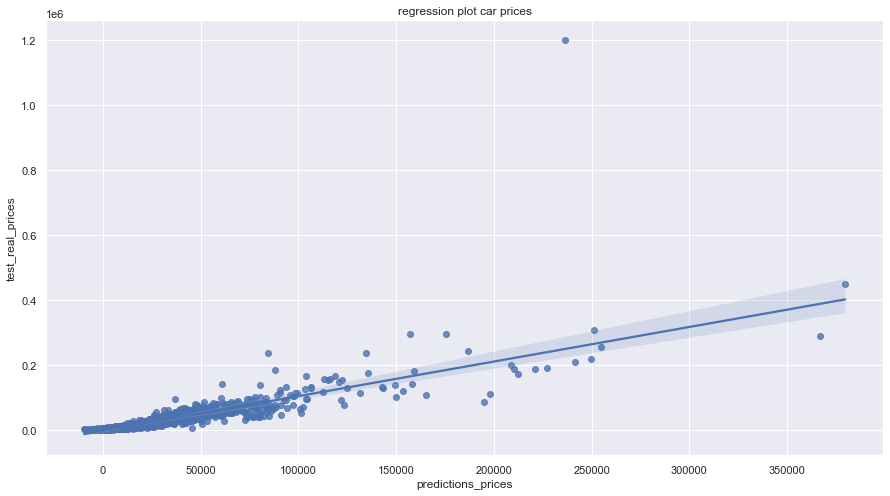

In [80]:
sns.regplot(x=predictions, y=y_test)
plt.xlabel('predictions_prices')
plt.ylabel('test_real_prices')
plt.title('regression plot car prices');

#### We have a benchmark and we will try different approaches

When we retry the benchmark model, we get different r2 scores in a really big range from really big negative numbers  that show us the model is bad, till almost 0.92 that show us the model is a nice model which could be improved, these different r2 scores depend on the train and test subsets in test-train splitting and I believe that the reason of the big range (of r2 scores) is the huge outliers, combined with the big amount of columns after concatenating numerical part with dummies. For instance, if we fit the train dataset with the max outlier (price=1,2 M) and many other big outliers then when we try to predict average or low car prices we will have a bad prediction and a bad r2 score and vice versa.

### outliers on the target variable:

#### distribution plot of the target variable

<AxesSubplot:xlabel='price', ylabel='Density'>

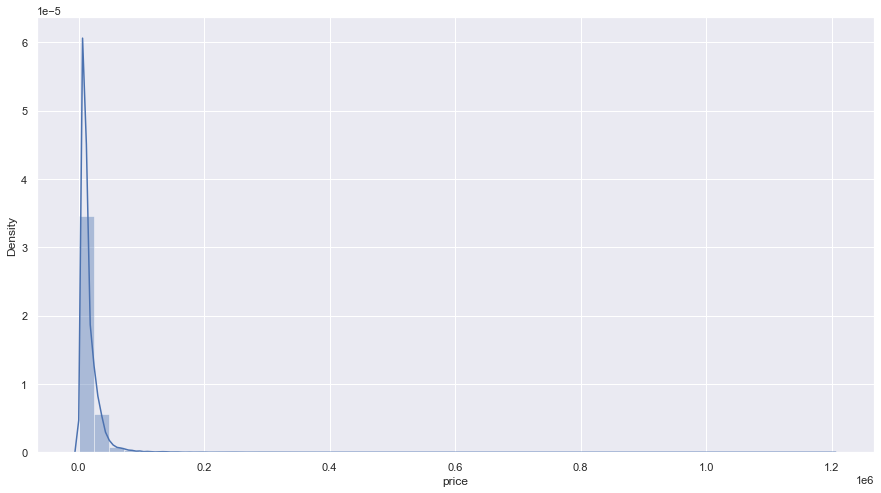

In [81]:
sns.distplot(df['price'])

it is skewed and there are outliers with really high price, the highest  price is 1.2 M when the average price is almost 16 K

df['price'].mean()

#### boxplot of the target variable

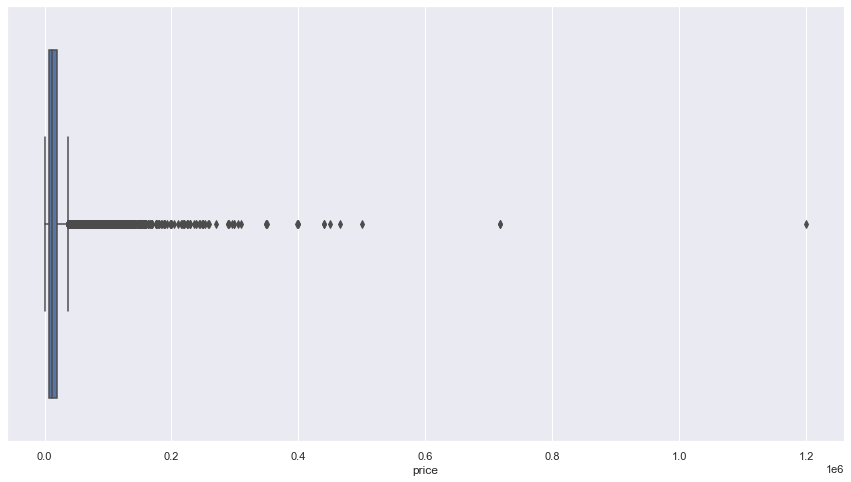

In [82]:
sns.boxplot(df['price'])
plt.show()

there are a lot of outliers at high prices, especially between the 75 percentile and the maximum price

#### finding some percentiles to understand better the data

In [83]:
quantile_75 = df['price'].quantile(0.75)
quantile_90 = df['price'].quantile(0.90)
quantile_95 = df['price'].quantile(0.95)
quantile_99 = df['price'].quantile(0.99)
print('the 75th percentile is: ', quantile_75,', the 90th percentile is: ', quantile_90,', the 95th percentile is: ', quantile_95,' and the 99th percentile is: ', quantile_99)

the 75th percentile is:  19490.0 , the 90th percentile is:  32490.0 , the 95th percentile is:  42450.0  and the 99th percentile is:  83417.18000000104


there is a really huge range of prices and we can really understand the outliers when the 90th percentile is:  32490 , the 95th percentile is:  42450 and the 99th percentile is:  83417

#### let's filter the outliers by price, price < 95th percentile

In [84]:
df_no_outliers = df[df['price'] < quantile_95]
df_no_outliers

,mileage,make,model,fuel_type,gearbox,offer_type,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116,1970-01-01 00:00:00.000002011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,1970-01-01 00:00:00.000002011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160,1970-01-01 00:00:00.000002011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110,1970-01-01 00:00:00.000002011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156,1970-01-01 00:00:00.000002011,11
...,...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72,1970-01-01 00:00:00.000002021,1
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71,1970-01-01 00:00:00.000002021,1
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69,1970-01-01 00:00:00.000002021,1
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69,1970-01-01 00:00:00.000002021,1


#### by removing outliers we get a better and more stable r2 score and we deduct some of the features from the dummies.

for example if we create a dataframe from the make's Maybach cars, we can notice that the cars are very expensive so when we will remove these observations-outliers from the whole dataset we will get a better and more stable R2 score and of course we will have less features on the dummies-encoded dataframe because we have already dropped the 'Maybach columns'

In [85]:
Maybach_df = df[(df.make == "Maybach")]
Maybach_df['price']

11753    717078
16429    499800
Name: price, dtype: int64

717078 > 42450 (95th percentile) and 499800 > 42450 (95th percentile), both prices are big outliers

#### difference between df and df_no_outliers

In [86]:
difference = df.shape[0]-df_no_outliers.shape[0]
print('the shape of df is: ', df.shape,' and the difference between df and df_no_outliers (df without outliers) is: ', difference, 'observations')

the shape of df is:  (44107, 10)  and the difference between df and df_no_outliers (df without outliers) is:  2207 observations


#### sorting df_no_outliers correlations

In [87]:
df_no_outliers.corr()['price'].sort_values(ascending=False)
# df correlations are:
# price      1.000000
# hp         0.744893
# mileage   -0.305364
# age       -0.411495

price      1.000000
hp         0.675248
mileage   -0.420609
age       -0.623943
Name: price, dtype: float64

### Bucketing the column make to reduce the columns after encoding 

#### taking a look at the categories of column make and counting each of them in df_no_outliers dataframe

In [88]:
categories_per_make = pd.DataFrame(df_no_outliers['make'].value_counts())
categories_per_make.columns = ['counts']
categories_per_make

,counts
Volkswagen,6451
Opel,4580
Ford,4234
Skoda,2702
Renault,2678
...,...
Trucks-Lkw,1
RAM,1
Brilliance,1
Others,1


#### making a list with the categories_per_make we would like to replace, choosing a logical threshold,

In [89]:
group_makes = categories_per_make[categories_per_make['counts'] < 35].index
group_makes

Index(['SsangYong', 'Cupra', 'Lada', 'Lexus', 'Porsche', 'Lancia', 'Dodge',
       'Infiniti', 'Microcar', 'DS', 'Daihatsu', 'Ligier', 'Piaggio',
       'Cadillac', 'Maserati', 'Chrysler', 'Iveco', 'Aixam', 'Tesla', 'Alpina',
       'Baic', 'DFSK', 'Estrima', 'Zhidou', 'Tazzari', 'Trucks-Lkw', 'RAM',
       'Brilliance', 'Others', 'Isuzu'],
      dtype='object')

#### creating a function that seperates makes, the subset 'other' has makes with less than 35 observations

In [90]:
def make_bucket(x):
    if x in group_makes:
        return 'other'
    else:
        return x

#### applying the function to the values of make column

In [91]:
df_no_outliers['make'] = df_no_outliers['make'].apply(make_bucket)

#### counting the new values of the make column, category other has 274 observations

In [92]:
df_no_outliers['make'].value_counts()

Volkswagen       6451
Opel             4580
Ford             4234
Skoda            2702
Renault          2678
BMW              2113
Audi             2087
Mercedes-Benz    1910
SEAT             1821
Hyundai          1717
Fiat             1490
Peugeot          1167
Toyota           1132
smart             932
Kia               930
Citroen           916
Nissan            723
Mazda             697
Dacia             663
Volvo             636
MINI              460
Mitsubishi        390
Suzuki            343
other             274
Chevrolet         211
Honda             175
Jeep              122
Alfa              108
Jaguar             75
Land               65
Subaru             57
Abarth             41
Name: make, dtype: int64

### Bucketing the column model to reduce the columns after encoding 

#### taking a look at the categories of column model and counting each of them in df_no_outliers dataframe

In [93]:
categories_per_model = pd.DataFrame(df_no_outliers['model'].value_counts())
categories_per_model.columns = ['counts_model']
categories_per_model

,counts_model
Golf,1450
Corsa,1395
Fiesta,1235
Astra,1142
Focus,948
...,...
Romeo Sportwagon,1
407,1
XJ,1
G,1


#### making a list with the categories_per_model we would like to replace, choosing a logical threshold

In [94]:
group_models = categories_per_model[categories_per_model['counts_model'] < 20].index
group_models

Index(['Jumpy', 'Cascada', 'A6 allroad', 'E 300', 'Verso-S', 'Q7', 'Tarraco',
       'Optima', 'C3 Aircross', 'Pixo',
       ...
       'Cooper SD Coupe', 'Grand Caravan', 'Cayman', 'M4', 'BS4',
       'Romeo Sportwagon', '407', 'XJ', 'G', 'NV250'],
      dtype='object', length=430)

#### creating a function that seperates models, the subset 'other model' has models with less than 20 observations

In [95]:
def model_bucket(x):
    if x in group_models:
        return 'other model'
    else:
        return x

#### applying the function to the values of the model column

In [96]:
df_no_outliers['model'] = df_no_outliers['model'].apply(model_bucket)

#### counting the new values of the column model, category other model has 2413 observations

In [97]:
df_no_outliers['model'].value_counts()

other model       2413
Golf              1450
Corsa             1395
Fiesta            1235
Astra             1142
                  ... 
Forester            20
Splash              20
Grand Cherokee      20
216                 20
540                 20
Name: model, Length: 278, dtype: int64

#### new X-y splitting of the new data

In [98]:
y_no_outliers = df_no_outliers['price']
X_no_outliers = df_no_outliers.drop('price', axis=1)
print('X is:  \n', X_no_outliers, '\nand y is : ', y_no_outliers )

X is:  
        mileage        make        model          fuel_type gearbox  \
0       235000         BMW          316             Diesel  Manual   
1        92800  Volkswagen         Golf           Gasoline  Manual   
2       149300        SEAT  other model           Gasoline  Manual   
3        96200     Renault       Megane           Gasoline  Manual   
4       156000     Peugeot          308           Gasoline  Manual   
...        ...         ...          ...                ...     ...   
46394       10     Citroen           C1           Gasoline  Manual   
46396       99        Fiat          500  Electric/Gasoline  Manual   
46397      550        Fiat          500  Electric/Gasoline  Manual   
46398      837        Fiat        Panda  Electric/Gasoline  Manual   
46399     1500       Skoda        Fabia           Gasoline  Manual   

           offer_type   hp                          year  age  
0                Used  116 1970-01-01 00:00:00.000002011   11  
1                Used 

#### Categorical features and numerical features will be treated differently. Splitting every column except the target in numerical and categorical

In [99]:
X_num_no_outliers = X_no_outliers.select_dtypes(include = np.number)
X_cat_no_outliers = X_no_outliers.select_dtypes(include = object)
X_num_no_outliers

,mileage,hp,age
0,235000,116,11
1,92800,122,11
2,149300,160,11
3,96200,110,11
4,156000,156,11
...,...,...,...
46394,10,72,1
46396,99,71,1
46397,550,69,1
46398,837,69,1


#### using One Hot/Label Encoding for the categorical features from the dataset of X_cat_no_outliers

In [100]:
encoder_no_outliers = OneHotEncoder(drop='first').fit(X_cat_no_outliers)
encoded_no_outliers = encoder_no_outliers.transform(X_cat_no_outliers).toarray()
cols = encoder_no_outliers.get_feature_names(input_features=X_cat_no_outliers.columns)
onehot_encoded_no_outliers = pd.DataFrame(encoded_no_outliers, columns=cols)
onehot_encoded_no_outliers#.head()

,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,make_Ford,make_Honda,make_Hyundai,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41896,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41897,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41898,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### concatenating DataFrames of the X_num_no_outliers subset and onehot_encoded_no_outliers subset

In [101]:
final_df_no_outliers = pd.concat([X_num_no_outliers.reset_index(drop=True), onehot_encoded_no_outliers.reset_index(drop=True)], axis=1, ignore_index=True)
final_df_no_outliers

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,235000,116,11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92800,122,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,149300,160,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,96200,110,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,156000,156,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41895,10,72,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41896,99,71,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41897,550,69,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41898,837,69,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### new X-y splitting, in the new dataframe without outliers

In [102]:
X_final_no_outliers = final_df_no_outliers
y_final_no_outliers = df_no_outliers['price']

#### new train-test splitting, in the new dataframe without outliers 
#### shapes of the datasets

In [103]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_final_no_outliers, y_final_no_outliers, test_size=0.2, random_state=42, shuffle = True)


print('X_train_no_outliers.shape is: ', X_train_no_outliers.shape)
print('X_test_no_outliers.shape is: ', X_test_no_outliers.shape)
print('y_train_no_outliers.shape is: ', y_train_no_outliers.shape)
print('y_test_no_outliers.shape is: ', y_test_no_outliers.shape)

X_train_no_outliers.shape is:  (33520, 328)
X_test_no_outliers.shape is:  (8380, 328)
y_train_no_outliers.shape is:  (33520,)
y_test_no_outliers.shape is:  (8380,)


#### fitting a new linear regression in the new dataset 

In [104]:
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

#### New metrics for the no_outliers dataset

In [105]:
# R2 score 
predictions_no_outliers = model_no_outliers.predict(X_test_no_outliers)
r2_score_no_outliers = r2_score(y_test_no_outliers, predictions_no_outliers) 

# MSE (Mean Squared Error) 
mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False)

# RMSE (Root Mean Squared Error) 
math.sqrt(mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False))

# MAE (Mean absolute error) 
mean_absolute_error(y_test_no_outliers, predictions_no_outliers)

# all of them
print('r2 score_no_outliers is: ', r2_score(y_test_no_outliers, predictions_no_outliers),'\n','RMSE_no_outliers is: ', math.sqrt(mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False)),'\n', 'MAE_no_outliers is: ', mean_absolute_error(y_test_no_outliers, predictions_no_outliers),'\n','and MSE_no_outliers is: ', mean_squared_error(y_test_no_outliers, predictions_no_outliers, squared=False))

r2 score_no_outliers is:  0.9023005971361877 
 RMSE_no_outliers is:  51.885315652349945 
 MAE_no_outliers is:  1957.939571389684 
 and MSE_no_outliers is:  2692.0859803439903


#### bias 𝑏₀

In [106]:
print('intercept_no_outliers:', model_no_outliers.intercept_)

intercept_no_outliers: 13173.190047803531


#### array containing 𝑏₁, 𝑏₂, ... respectively

In [107]:
print('slope_no_outliers:', model_no_outliers.coef_)

slope_no_outliers: [-3.97720255e-02  6.45367223e+01 -9.63266630e+02  6.26645546e+03
  6.18253466e+03  2.82651483e+03 -2.47771505e+03  1.13777196e+02
  2.32041172e+03 -1.10473867e+03  9.04531963e+02  3.16570878e+02
 -1.35013032e+02  7.48710124e+03  4.22734352e+03  1.94426225e+03
  7.55683019e+03  1.27222619e+03 -5.59930855e+02  5.84347330e+03
 -5.82946160e+02  2.08188968e+03  4.78734297e+02  2.91871240e+03
 -3.05550030e+02  1.80477465e+03 -9.56407868e+01  1.14263683e+03
 -1.26743933e+03  2.19742504e+03  7.10269766e+03  2.98273821e+03
  1.64187405e+03 -3.23385125e+03 -3.05559930e+03  2.68917615e+03
  2.07334784e+03  2.00621028e+03  1.61009489e+03  3.25764163e+03
 -1.20088889e+02  1.11207468e+03  4.66137437e+02 -1.01837686e+03
  1.81360882e+03  3.28269389e+03  2.96880395e+03  4.86569670e+03
  4.04527350e+03 -3.65412913e+02  4.17625371e+03  2.54827677e+03
  3.54321236e+03  1.23385076e+03  2.46579407e+03  7.35881365e+03
  6.21085240e+03  4.97785350e+03  2.56326632e+03  3.75645983e+03
  4.68

#### regression plot between predictions_prices_no_outliers and test_real_prices_no_outliers

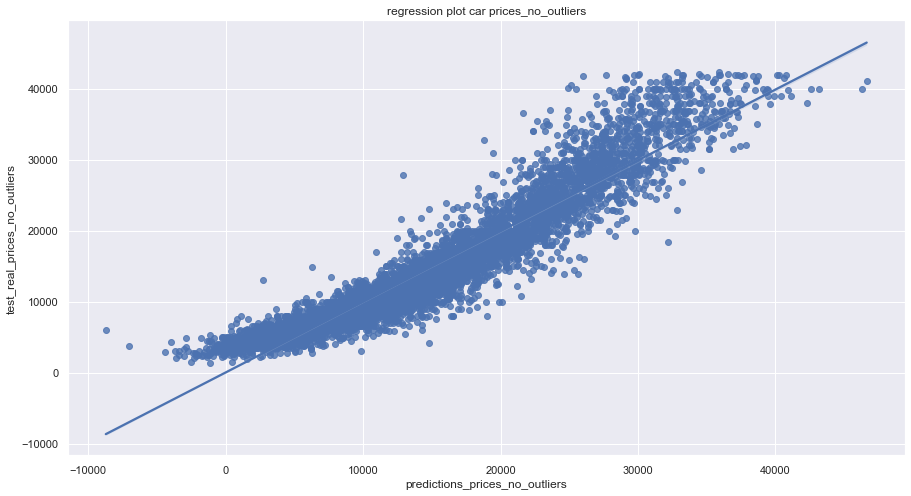

In [108]:
sns.regplot(x=predictions_no_outliers, y=y_test_no_outliers)
plt.xlabel('predictions_prices_no_outliers')
plt.ylabel('test_real_prices_no_outliers')
plt.title('regression plot car prices_no_outliers');

### Trying different techniques in the df_no_outliers dataframe, df without outliers

#### Trying scaling in numerical part

In [109]:
X_num_no_outliers.head(2)

,mileage,hp,age
0,235000,116,11
1,92800,122,11


### Min-Max scaling

#### Min-max scaler for X_num_no_outliers)
For each column, each value in the column is subtracted by the max of the column and then divided by the difference of max and min of the column. Data range from 0 - 1, instead of min to max. It is very sensitive to the presence of outliers.

In [110]:
MinMaxtransformer = MinMaxScaler().fit(X_num_no_outliers)
X_num_no_outliers_norm_MinMax = MinMaxtransformer.transform(X_num_no_outliers)
print(X_num_no_outliers_norm_MinMax.shape)
X_num_no_outliers_norm_MinMax = pd.DataFrame(X_num_no_outliers_norm_MinMax, columns=X_num_no_outliers.columns)
X_num_no_outliers_norm_MinMax.head(2)

(41900, 3)


,mileage,hp,age
0,0.21150,0.201754,1.0
1,0.08352,0.212281,1.0


we also have already the onehot_encoded_no_outliers dataframe

In [111]:
onehot_encoded_no_outliers.head(2)

,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,make_Ford,make_Honda,make_Hyundai,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### concatenating DataFrames X_num_no_outliers_norm_MinMax and onehot_encoded_no_outliers

In [112]:
X_concat_no_outliers_norm_MinMax = pd.concat([X_num_no_outliers_norm_MinMax, onehot_encoded_no_outliers], axis=1)
X_concat_no_outliers_norm_MinMax

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,0.211500,0.201754,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.083520,0.212281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134370,0.278947,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.086580,0.191228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.140400,0.271930,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41895,0.000009,0.124561,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41896,0.000089,0.122807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41897,0.000495,0.119298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41898,0.000753,0.119298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### defining final_df_no_outliers_norm_MinMax dataframe, independent variables or predictors and dependent variables or responses

In [113]:
final_df_no_outliers_norm_MinMax = X_concat_no_outliers_norm_MinMax

X_final_no_outliers_norm_MinMax = final_df_no_outliers_norm_MinMax

y_final_df_no_outliers_norm_MinMax = df_no_outliers['price']
X_final_no_outliers_norm_MinMax.tail(3)

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
41897,0.000495,0.119298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41898,0.000753,0.119298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41899,0.001350,0.103509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### new train-test splitting based on the new data and shapes of the new datasets

In [114]:
X_train_no_outliers_norm_MinMax, X_test_no_outliers_norm_MinMax, y_train_no_outliers_norm_MinMax, y_test_no_outliers_norm_MinMax = train_test_split(X_final_no_outliers_norm_MinMax, y_final_df_no_outliers_norm_MinMax, test_size=0.2, random_state=42)
 
print('X_train_no_outliers_norm_MinMax.shape is: ', X_train_no_outliers_norm_MinMax.shape)
print('X_test_no_outliers_norm_MinMax.shape is: ', X_test_no_outliers_norm_MinMax.shape)
print('y_train_no_outliers_norm_MinMax.shape is: ', y_train_no_outliers_norm_MinMax.shape)
print('y_test_no_outliers_norm_MinMax.shape is: ', y_test_no_outliers_norm_MinMax.shape)

X_train_no_outliers_norm_MinMax.shape is:  (33520, 328)
X_test_no_outliers_norm_MinMax.shape is:  (8380, 328)
y_train_no_outliers_norm_MinMax.shape is:  (33520,)
y_test_no_outliers_norm_MinMax.shape is:  (8380,)


#### fitting linear regression in the new dataset

In [115]:
model_no_outliers_norm_MinMax = LinearRegression()
model_no_outliers_norm_MinMax.fit(X_train_no_outliers_norm_MinMax, y_train_no_outliers_norm_MinMax)

LinearRegression()

#### New metrics MimMax scaling

In [116]:
# R2 score 
predictions_no_outliers_norm_MinMax = model_no_outliers_norm_MinMax.predict(X_test_no_outliers_norm_MinMax)
r2_score_no_outliers_norm_MinMax = r2_score(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax)

# MSE (Mean Squared Error) 
mean_squared_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax, squared=False)

# RMSE (Root Mean Squared Error) 
math.sqrt(mean_squared_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax, squared=False))

# MAE (Mean absolute error) 
mean_absolute_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax)

# all of them
print('r2 score_no_outliers_norm_MinMax is: ', r2_score(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax),'\n','RMSE_no_outliers_norm_MinMax is: ', math.sqrt(mean_squared_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax, squared=False)),'\n', 'MAE_no_outliers_norm_MinMax is: ', mean_absolute_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax),'\n','and MSE_no_outliers_norm_MinMax is: ', mean_squared_error(y_test_no_outliers_norm_MinMax, predictions_no_outliers_norm_MinMax, squared=False))
# almost similar R2 score with the non MinMax scaling no_outliers R2 score, it is a little bit better for a really small number 
# could be because we have already manipulated the outliers

r2 score_no_outliers_norm_MinMax is:  0.9023005971371257 
 RMSE_no_outliers_norm_MinMax is:  51.88531565222541 
 MAE_no_outliers_norm_MinMax is:  1957.9395713804142 
 and MSE_no_outliers_norm_MinMax is:  2692.085980331067


### Standar scaling

For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation. Works row wise, so it takes information from the whole column.

In [117]:
Standard_scaler = StandardScaler().fit(X_num_no_outliers) 
X_num_no_outliers_norm_StandardSc = Standard_scaler.transform(X_num_no_outliers)
X_num_no_outliers_norm_StandardSc = pd.DataFrame(X_num_no_outliers_norm_StandardSc, columns=X_num_no_outliers.columns)
X_num_no_outliers_norm_StandardSc.head(3)

,mileage,hp,age
0,2.564351,-0.132148,1.546237
1,0.287199,-0.017091,1.546237
2,1.191975,0.711608,1.546237


#### concatenating DataFrames X_num_no_outliers_norm_StandardSc and onehot_encoded_no_outliers

In [118]:
X_concat_no_outliers_norm_StandardSc = pd.concat([X_num_no_outliers_norm_StandardSc, onehot_encoded_no_outliers], axis=1)
X_concat_no_outliers_norm_StandardSc

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,2.564351,-0.132148,1.546237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.287199,-0.017091,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.191975,0.711608,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.341646,-0.247206,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.299267,0.634903,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41895,-1.198715,-0.975905,-1.700142,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41896,-1.197290,-0.995081,-1.700142,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
41897,-1.190068,-1.033434,-1.700142,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41898,-1.185472,-1.033434,-1.700142,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### defining final_df_no_outliers_norm_StandardSc dataframe, independent variables or predictors and dependent variables or responses

In [119]:
final_df_no_outliers_norm_StandardSc = X_concat_no_outliers_norm_StandardSc

X_final_no_outliers_norm_StandardSc = final_df_no_outliers_norm_StandardSc

y_final_df_no_outliers_norm_StandardSc = df_no_outliers['price']
X_final_no_outliers_norm_StandardSc.head(3)

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
0,2.564351,-0.132148,1.546237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.287199,-0.017091,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.191975,0.711608,1.546237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### new train-test splitting based on the new data after StandardScaling and shapes of the new datasets

In [120]:
X_train_no_outliers_norm_StandardSc, X_test_no_outliers_norm_StandardSc, y_train_no_outliers_norm_StandardSc, y_test_no_outliers_norm_StandardSc = train_test_split(X_final_no_outliers_norm_StandardSc, y_final_df_no_outliers_norm_StandardSc, test_size=0.2, random_state=42)

print('X_train_no_outliers_norm_StandardSc.shape is: ', X_train_no_outliers_norm_StandardSc.shape)
print('X_test_no_outliers_norm_StandardSc.shape is: ', X_test_no_outliers_norm_StandardSc.shape)
print('y_train_no_outliers_norm_StandardSc.shape is: ', y_train_no_outliers_norm_StandardSc.shape)
print('y_test_no_outliers_norm_StandardSc.shape is: ', y_test_no_outliers_norm_StandardSc.shape)

X_train_no_outliers_norm_StandardSc.shape is:  (33520, 328)
X_test_no_outliers_norm_StandardSc.shape is:  (8380, 328)
y_train_no_outliers_norm_StandardSc.shape is:  (33520,)
y_test_no_outliers_norm_StandardSc.shape is:  (8380,)


#### fitting linear regression in the new dataset

In [121]:
 model_no_outliers_norm_StandardSc = LinearRegression()
model_no_outliers_norm_StandardSc.fit(X_train_no_outliers_norm_StandardSc, y_train_no_outliers_norm_StandardSc)

LinearRegression()

#### New metrics Standard Scaling 

In [122]:
# R2 score 
predictions_no_outliers_norm_StandardSc = model_no_outliers_norm_StandardSc.predict(X_test_no_outliers_norm_StandardSc)
r2_score_no_outliers_norm_StandardSc = r2_score(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc)

# MSE (Mean Squared Error) 
mean_squared_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc, squared=False)

# RMSE (Root Mean Squared Error) 
math.sqrt(mean_squared_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc, squared=False))

# MAE (Mean absolute error) 
mean_absolute_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc)

# all of them
print('r2 score_no_outliers_norm_StandardSc is: ', r2_score(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc),'\n','RMSE_no_outliers_norm_StandardSc is: ', math.sqrt(mean_squared_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc, squared=False)),'\n', 'MAE_no_outliers_norm_StandardSc is: ', mean_absolute_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc),'\n','and MSE_no_outliers_norm_StandardSc is: ', mean_squared_error(y_test_no_outliers_norm_StandardSc, predictions_no_outliers_norm_StandardSc, squared=False))


r2 score_no_outliers_norm_StandardSc is:  0.9023005971371256 
 RMSE_no_outliers_norm_StandardSc is:  51.885315652225415 
 MAE_no_outliers_norm_StandardSc is:  1957.9395713804163 
 and MSE_no_outliers_norm_StandardSc is:  2692.0859803310677


Standar scaling score is a little bit worse than the MinMax scaling score, the differences are really small numbers 

### Normalization

For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance. It is calculated column wise, so it takes the values of a whole row to calculate.

In [123]:
Normalizertransformer = Normalizer().fit(X_num_no_outliers)
X_num_no_outliers_norm_Normalizer = Normalizertransformer.transform(X_num_no_outliers)
X_num_no_outliers_norm_Normalizer = pd.DataFrame(X_num_no_outliers_norm_Normalizer, columns=X_num_no_outliers.columns)
X_num_no_outliers_norm_Normalizer.head(2)

,mileage,hp,age
0,1.000000,0.000494,0.000047
1,0.999999,0.001315,0.000119


#### concatenating DataFrames X_num_no_outliers_norm_Normalizer and onehot_encoded_no_outliers

In [124]:
X_concat_no_outliers_norm_Normalizer = pd.concat([X_num_no_outliers_norm_Normalizer, onehot_encoded_no_outliers], axis=1)
X_concat_no_outliers_norm_Normalizer.iloc[15:18]

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
15,1.0,0.000833,0.000153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
16,1.0,0.000789,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17,1.0,0.000789,0.000058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### defining final_df_no_outliers_norm_MinMax dataframe, independent variables or predictors and dependent variables or responses

In [125]:
final_df_no_outliers_norm_Normalizer = X_concat_no_outliers_norm_Normalizer

X_final_no_outliers_norm_Normalizer = final_df_no_outliers_norm_Normalizer
 
y_final_df_no_outliers_norm_Normalizer = df_no_outliers['price']
X_final_no_outliers_norm_MinMax.iloc[50:53]

,mileage,hp,age,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Dacia,make_Fiat,...,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Others,gearbox_Manual,gearbox_Semi-automatic,gearbox_unknown,offer_type_Employee's car,offer_type_New,offer_type_Pre-registered,offer_type_Used
50,0.216000,0.261404,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
51,0.072450,0.177193,0.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
52,0.175794,0.243860,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### new train-test splitting based on the new data after Normalizing them and the shapes of the new datasets

In [126]:
X_train_no_outliers_norm_Normalizer, X_test_no_outliers_norm_Normalizer, y_train_no_outliers_norm_Normalizer, y_test_no_outliers_norm_Normalizer = train_test_split(X_final_no_outliers_norm_Normalizer, y_final_df_no_outliers_norm_Normalizer, test_size=0.2, random_state=42)

print('X_train_no_outliers_norm_Normalizer.shape is: ', X_train_no_outliers_norm_Normalizer.shape)
print('X_test_no_outliers_norm_Normalizer.shape is: ', X_test_no_outliers_norm_Normalizer.shape)
print('y_train_no_outliers_norm_Normalizer.shape is: ', y_train_no_outliers_norm_Normalizer.shape)
print('y_test_no_outliers_norm_Normalizer.shape is: ', y_test_no_outliers_norm_Normalizer.shape)

X_train_no_outliers_norm_Normalizer.shape is:  (33520, 328)
X_test_no_outliers_norm_Normalizer.shape is:  (8380, 328)
y_train_no_outliers_norm_Normalizer.shape is:  (33520,)
y_test_no_outliers_norm_Normalizer.shape is:  (8380,)


#### fitting linear regression in the new dataset 

In [127]:
model_no_outliers_norm_Normalizer = LinearRegression()
model_no_outliers_norm_Normalizer.fit(X_train_no_outliers_norm_Normalizer, y_train_no_outliers_norm_Normalizer)

LinearRegression()

#### new Metrics Normalizing

In [128]:
# R2 score 
predictions_no_outliers_norm_Normalizer = model_no_outliers_norm_Normalizer.predict(X_test_no_outliers_norm_Normalizer)
r2_score_no_outliers_norm_Normalizer = r2_score(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer)


# MSE (Mean Squared Error) 
mean_squared_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer, squared=False)

# RMSE (Root Mean Squared Error) 
math.sqrt(mean_squared_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer, squared=False))

# MAE (Mean absolute error) 
mean_absolute_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer)

# all of them
print('r2 score_no_outliers_norm_Normalizer is: ', r2_score(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer),'\n','RMSE_no_outliers_norm_Normalizer is: ', math.sqrt(mean_squared_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer, squared=False)),'\n', 'MAE_no_outliers_norm_Normalizer is: ', mean_absolute_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer),'\n','and MSE_no_outliers_norm_Normalizer is: ', mean_squared_error(y_test_no_outliers_norm_Normalizer, predictions_no_outliers_norm_Normalizer, squared=False))
# worse R2 score than before 

r2 score_no_outliers_norm_Normalizer is:  0.6820100862466294 
 RMSE_no_outliers_norm_Normalizer is:  69.69069924765871 
 MAE_no_outliers_norm_Normalizer is:  3553.5414083729493 
 and MSE_no_outliers_norm_Normalizer is:  4856.793561627619


### using KNN-K Nearest Neighbors in no_outliers dataset

In [129]:
# checking which k is the best
r2_val=[]
rmse_val = [] 
mse_val = []
mae_val = []

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
# fitting the model with X_train_no_outliers_norm_MinMax and y_train_no_outliers datasets
    model.fit(X_train_no_outliers_norm_MinMax, y_train_no_outliers)  

# make prediction on test set, X_test_no_outliers_norm_MinMax
    pred=model.predict(X_test_no_outliers_norm_MinMax) 
   # error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
     #store rmse values
    
    r2_k=r2_score(y_test_no_outliers, pred)
    rmse_k=mean_squared_error(y_test_no_outliers, pred, squared=False)
    mse_k=mean_squared_error(y_test_no_outliers, pred)
    mae_k=mean_absolute_error(y_test_no_outliers, pred)
    
    r2_val.append(r2_k)
    rmse_val.append(rmse_k)
    mse_val.append(mse_k)
    mae_val.append(mae_k)
    print('r2 value for  k = ' , K , 'is:', r2_k)
    print('RMSE value for k = ' , K , 'is:', rmse_k)
    print('MSE value for k = ' , K , 'is:', mse_k)
    print('MAE value for k = ' , K , 'is:', mae_k)
    print('\n')

r2 value for  k =  1 is: 0.8918508714750343
RMSE value for k =  1 is: 2832.3993352617863
MSE value for k =  1 is: 8022485.994391408
MAE value for k =  1 is: 1813.6531026252983


r2 value for  k =  2 is: 0.9119490494091618
RMSE value for k =  2 is: 2555.700724941282
MSE value for k =  2 is: 6531606.195465393
MAE value for k =  2 is: 1647.729355608592


r2 value for  k =  3 is: 0.9145136162692485
RMSE value for k =  3 is: 2518.207103024521
MSE value for k =  3 is: 6341367.01372315
MAE value for k =  3 is: 1629.470604614161


r2 value for  k =  4 is: 0.913616801218115
RMSE value for k =  4 is: 2531.381563209325
MSE value for k =  4 is: 6407892.618556086
MAE value for k =  4 is: 1635.885202863962


r2 value for  k =  5 is: 0.9100942625364442
RMSE value for k =  5 is: 2582.4782680812964
MSE value for k =  5 is: 6669194.005112172
MAE value for k =  5 is: 1664.3723866348448


r2 value for  k =  6 is: 0.9071367293481133
RMSE value for k =  6 is: 2624.6110892168413
MSE value for k =  6 is: 6888

for k=3 the r2 value is bigger than the rest of ks', so k=3 gives the best results, the r2 score for k=3 is 0.9145136162692485, much better from every scaled linear regression r2 score, KNN regressor will take the distances from the k=3 nearest neightbors and "average" them for the prediction.

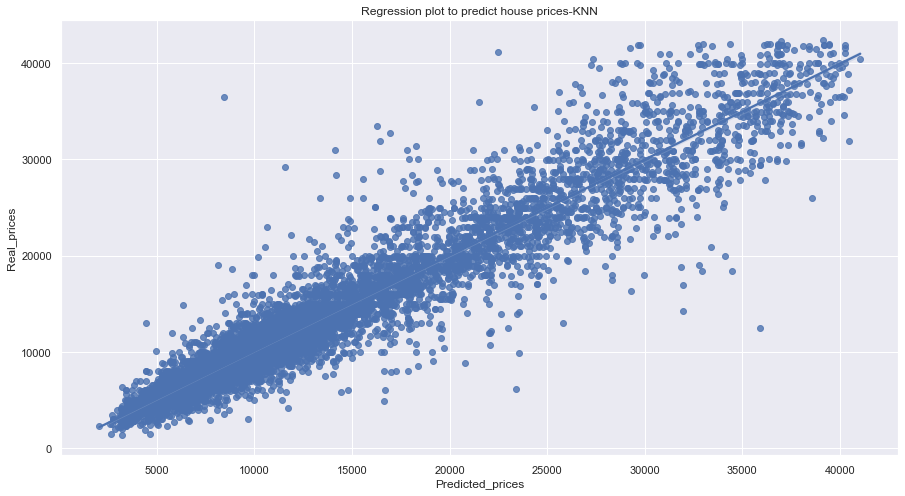

In [130]:
model_k3 = neighbors.KNeighborsRegressor(n_neighbors = 3)
model_k3.fit(X_train_no_outliers_norm_MinMax, y_train_no_outliers)  
pred_k3=model_k3.predict(X_test_no_outliers_norm_MinMax)

# regression plot between Predicted_prices-Real_prices using KNN-K Nearest Neighbors
sns.regplot(x=pred_k3, y=y_test_no_outliers)
plt.xlabel('Predicted_prices')
plt.ylabel('Real_prices')
plt.title('Regression plot to predict house prices-KNN');

### Random Forest

Random Forest is a model built by several decision trees, using ensemble method. It averages several decision trees trained on sub-samples of the training set. By default, returns a better result and control over-fitting.

### Random Forest in the initial dataset

In [131]:
model_RandomForestRegressor = RandomForestRegressor(criterion='friedman_mse', max_depth=None, random_state=42, bootstrap=True, n_jobs=-1)
model_RandomForestRegressor.fit(X_train, y_train)
model_RandomForestRegressor.score(X_test, y_test)
# Bootstrap: True = sub samples, False = whole dataset

0.7573480435397507

the score is good, but like before the range of the scores is big, because of the outliers

### Random Forest in the processed dataset

In [132]:
model_RandomForestRegressor = RandomForestRegressor(criterion='friedman_mse', max_depth=None, random_state=42, bootstrap=True, n_jobs=-1)
model_RandomForestRegressor.fit(X_train_no_outliers_norm_MinMax, y_train_no_outliers_norm_MinMax)
r2_score_no_outliers_norm_MinMax_RandomForest = model_RandomForestRegressor.score(X_test_no_outliers_norm_MinMax, y_test_no_outliers_norm_MinMax)
r2_score_no_outliers_norm_MinMax_RandomForest

0.9385399610709613

the score is 0.9385399610709613 and is the best

In [133]:
predictions=model_RandomForestRegressor.predict(X_test_no_outliers_norm_MinMax)
predictions

array([ 8633.73      , 16477.52      ,  8218.28      , ...,
       11466.79      ,  7681.16      ,  4052.66666667])

#### Metrics Random Forest in the processed dataset

In [134]:
# MSE (Mean Squared Error) 
MSE_no_outliers_norm_MinMax_RandomForest = mean_squared_error(y_test_no_outliers_norm_MinMax, predictions, squared=False)

# RMSE (Root Mean Squared Error) 
RMSE_no_outliers_norm_MinMax_RandomForest = math.sqrt(mean_squared_error(y_test_no_outliers_norm_MinMax, predictions, squared=False))

# MAE (Mean absolute error) 
MAE_no_outliers_norm_MinMax_RandomForest = mean_absolute_error(y_test_no_outliers_norm_MinMax, predictions)

# all of them
print('r2 score_no_outliers_norm_MinMax_RandomForest is: ', r2_score_no_outliers_norm_MinMax_RandomForest,'\n','RMSE_no_outliers_norm_MinMax_RandomForest is: ', RMSE_no_outliers_norm_MinMax_RandomForest,'\n', 'MAE_no_outliers_norm_MinMax_RandomForest is: ', MAE_no_outliers_norm_MinMax_RandomForest,'\n','and MSE_no_outliers_norm_MinMax_RandomForest is: ',MSE_no_outliers_norm_MinMax_RandomForest)
    

r2 score_no_outliers_norm_MinMax_RandomForest is:  0.9385399610709613 
 RMSE_no_outliers_norm_MinMax_RandomForest is:  46.2082683404975 
 MAE_no_outliers_norm_MinMax_RandomForest is:  1432.703910535061 
 and MSE_no_outliers_norm_MinMax_RandomForest is:  2135.204063027423


#### regression plot between predictions_prices_no_outliers and test_real_prices_no_outliers

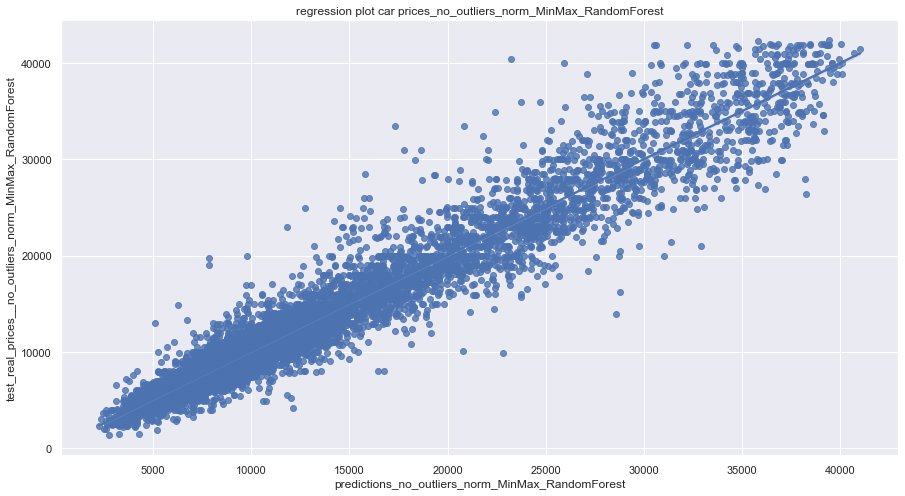

In [135]:
sns.regplot(x=predictions, y=y_test_no_outliers_norm_MinMax)
plt.xlabel('predictions_no_outliers_norm_MinMax_RandomForest')
plt.ylabel('test_real_prices__no_outliers_norm_MinMax_RandomForest')
plt.title('regression plot car prices_no_outliers_norm_MinMax_RandomForest');

if we like to predict a specific value then we should get different parameters to a list, the list should have the same 
dimension with the model and if the features are scaled we should put scaled parameters unless we unscale them

prediction_specific=model_RandomForestRegressor.predict([X1,X2,....,Xn ])

In [136]:
# we could also use a pipeline to check the metrics

# X, y = load_boston(return_X_y=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# model = RandomForestRegressor(random_state=42)

# cross_val_score(model, X_train, y_train, cv=5)

# model1 = RandomForestRegressor(random_state=42)
# model2 = LinearRegression()
# model3 = KNeighborsRegressor()

# model_pipeline = [model1, model2, model3]
# model_names = ['Random Forest', 'Linear Regression', 'KNN']

# scores = {}

# for i, model in enumerate(model_pipeline):
#     results = cross_val_score(model, X_train, y_train, cv=10)
#     mean_r2 = np.mean(results)
#     std_r2 = np.std(results)
    
#     results = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
#     mean_rmse = np.mean(results)
#     std_rmse = np.std(results)
    
#     scores[model_names[i]] = [mean_r2, std_r2, mean_rmse, std_rmse]
    
# df_models = pd.DataFrame.from_dict(scores, orient='index', columns={'r2', 'rmse', 'mean_rmse', 'std_rmse'})
# df_models

In [137]:
# we could also transform the price to log(price) and check what happen
# df['price'] = df['price'].map(lambda p: np.log(p))

